##### Importing modules

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from itertools import cycle
import re

In [2]:
# pandas configuration
pd.set_option('display.max_columns', None)  # show all columns horizontally
pd.set_option('display.width', 200)         # wider display before wrap
pd.set_option('display.float_format', lambda x: f'{x:.3f}')  # format floats
pd.set_option('display.max_columns', None) # render all columns during print/display operation

# seaborn configuration
sns.set_style("darkgrid") # print darker grids through seaborn
sns.set_palette("Set2") # colour palette of the graphs through seaborn

##### Load dataset

In [3]:
data = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

# Dataset exploration

In [4]:
# first view
data.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country Managed By  Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date PO Sent to Vendor Date  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   PMO - US  Direct Drop              FCA           Air               Pre-PQ Process      Date Not Captured   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured   

  Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date Product Group Sub Classification                                             Vendor  \
0                2-Jun-06                 2-Jun-06               2-Jun-06          HRDT           HIV test                        RANBAXY Fine Chemicals LTD.   
1               14-Nov-06                14-Nov-06              14-Nov-06           ARV          Pediatric                           Aurobindo Pharma Limited   
2               27-Aug-06                27-Aug-06              27-Aug-06          HRDT           HIV test                               Abbott GmbH & Co. KG   
3                1-Sep-06                 1-Sep-06               1-Sep-06           ARV              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4               11-Aug-06                11-Aug-06              11-Aug-06           ARV              Adult                           Aurobindo Pharma Limited   

                                    Item Description                        Molecule/Test Type      Brand   Dosage      Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal      NaN         Test kit                          30                  19          551.000   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...                                Nevirapine    Generic  10mg/ml  Oral suspension                         240                1000         6200.000   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests       HIV 1/2, Determine Complete HIV Kit  Determine      NaN         Test kit                         100                 500        40000.000   
3                 Lamivudine 150mg, tablets, 60 Tabs                                Lamivudine    Generic    150mg           Tablet                          60               31920       127360.800   
4                  Stavudine 30mg, capsules, 60 Caps                                 Stavudine    Generic     30mg          Capsule                          60               38000       121600.000   

   Pack Price  Unit Price             Manufacturing Site First Line Designation Weight (Kilograms) Freight Cost (USD)  Line Item Insurance (USD)  
0      29.000       0.970     Ranbaxy Fine Chemicals LTD                    Yes                 13             780.34                        NaN  
1       6.200       0.030      Aurobindo Unit III, India                    Yes                358             4521.5                        NaN  
2      80.000       0.800  ABBVIE GmbH & Co.KG Wiesbaden                    Yes                171            1653.78                        NaN  
3       3.990       0.070  Ranbaxy, Paonta Shahib, India                    Yes               1855           16007.06                        NaN  
4       3.200       0.050

In [5]:
# rows & column count
data.shape

(10324, 33)

In [6]:
# dataset info
data.info

<bound method DataFrame.info of           ID Project Code            PQ # PO / SO # ASN/DN #        Country Managed By  Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date PO Sent to Vendor Date  \
0          1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured   
1          3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured   
2          4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   PMO - US  Direct Drop              FCA           Air               Pre-PQ Process      Date Not Captured   
3         15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   PMO - US  Direct Drop              EXW           Air               Pre-PQ Process      Date Not Captured   
4         16   108-VN-T01  Pre-PQ Proc

In [7]:
# duplicate column count
len(data[data.duplicated()])

0

In [8]:
# total percentage values of the missing data in the dataset
def unique_per_cent(df):
    missing_data = df.isnull().sum().to_frame("Missing Values")
    missing_data["Missing Values (%)"] = (df.isnull().mean() * 100).round(2) # calculates the percentage
    return missing_data

print(unique_per_cent(data))

                              Missing Values  Missing Values (%)
ID                                         0               0.000
Project Code                               0               0.000
PQ #                                       0               0.000
PO / SO #                                  0               0.000
ASN/DN #                                   0               0.000
Country                                    0               0.000
Managed By                                 0               0.000
Fulfill Via                                0               0.000
Vendor INCO Term                           0               0.000
Shipment Mode                            360               3.490
PQ First Sent to Client Date               0               0.000
PO Sent to Vendor Date                     0               0.000
Scheduled Delivery Date                    0               0.000
Delivered to Client Date                   0               0.000
Delivery Recorded Date   

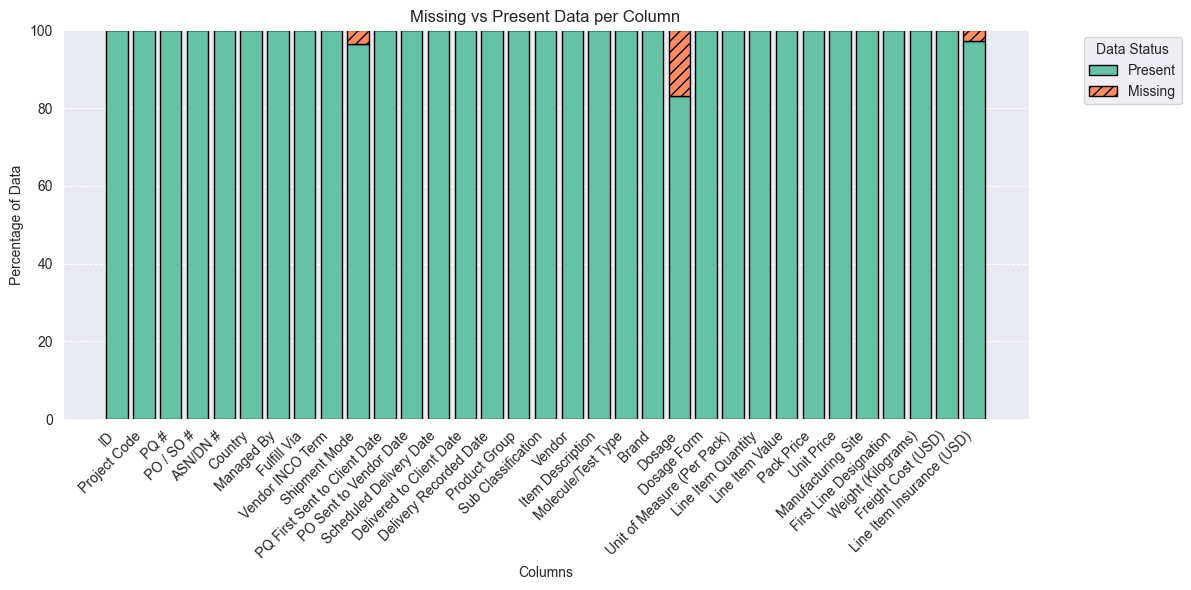

In [10]:
# func to visualise missing values
def visualise_missing_val(df):
    # calculate total, missing and present values
    total = len(df)
    missing = df.isna().sum()
    present = total - missing

    # create DataFrame with counts
    data = pd.DataFrame({
        'Present': present,
        'Missing': missing
    })

    data_percent = data.div(data.sum(axis=1), axis=0) * 100 # convert to perentages

    fig, ax = plt.subplots(figsize=(12, 6)) # set plot style

    # bar locations
    bar_positions = range(len(data_percent))
    bar_width = 0.8

    palette = sns.color_palette("Set2")
    known_color = palette[0]   # green-ish tone
    missing_color = palette[1] # reddish tone
    
    # plot present values (bottom part of stack)
    ax.bar(
        bar_positions,
        data_percent['Present'],
        label='Present',
        color=known_color,
        edgecolor='black'
    )

    # plot missing values
    ax.bar(
        bar_positions,
        data_percent['Missing'],
        bottom=data_percent['Present'],
        label='Missing',
        color=missing_color,
        edgecolor='black',
        hatch='///'  
    )

    # X-axis formatting
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(data_percent.index, rotation=45, ha='right')

    # labels and formatting
    ax.set_ylabel("Percentage of Data")
    ax.set_xlabel("Columns")
    ax.set_title("Missing vs Present Data per Column")
    ax.legend(title='Data Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, axis='y', linestyle='--', linewidth=0.7)

    plt.tight_layout()
    plt.show()

visualise_missing_val(data)

# Understanding data

In [11]:
# data type of each column
print(data.dtypes)

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [12]:
# data description
data.describe(include='all')

ID Project Code            PQ #    PO / SO #   ASN/DN #       Country Managed By Fulfill Via Vendor INCO Term Shipment Mode PQ First Sent to Client Date PO Sent to Vendor Date  \
count  10324.000        10324           10324        10324      10324         10324      10324       10324            10324          9964                        10324                  10324   
unique       NaN          142            1237         6233       7030            43          4           2                8             4                          765                    897   
top          NaN   116-ZA-T30  Pre-PQ Process  SCMS-199289  ASN-19166  South Africa   PMO - US    From RDC   N/A - From RDC           Air               Pre-PQ Process         N/A - From RDC   
freq         NaN          768            2681           67         54          1406      10265        5404             5404          6113                         2476                   5404   
mean   51098.968          NaN             NaN          NaN        NaN           NaN        NaN         NaN              NaN           NaN                          NaN                    NaN   
std    31944.332          NaN             NaN          NaN        NaN           NaN        NaN         NaN              NaN           NaN                          NaN                    NaN   
min        1.000          NaN             NaN          NaN        NaN           NaN        NaN         NaN              NaN           NaN                          NaN                    NaN   
25%    12795.750          NaN             NaN          NaN        NaN           NaN        NaN         NaN              NaN           NaN                          NaN                    NaN   
50%    57540.500          NaN             NaN          NaN        NaN           NaN        NaN         NaN              NaN           NaN                          NaN                    NaN   
75%    83648.250          NaN             NaN          NaN        NaN           NaN        NaN         NaN              NaN           NaN                          NaN                    NaN   
max    86823.000          NaN             NaN          NaN        NaN           NaN        NaN         NaN              NaN           NaN                          NaN                    NaN   

       Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date Product Group Sub Classification         Vendor                   Item Description Molecule/Test Type    Brand Dosage  \
count                    10324                    10324                  10324         10324              10324          10324                              10324              10324    10324   8588   
unique                    2006                     2093                   2042             5                  6             73                                184                 86       48     54   
top                  29-Aug-14                29-Aug-14              29-Aug-14           ARV              Adult  SCMS from RDC  Efavirenz 600mg, tablets, 30 Tabs          Efavirenz  Generic  300mg   
freq                        97                       74                     67          8550               6595           5404                                755               1125     7285    990   
mean                       NaN                      NaN                    NaN           NaN                NaN            NaN                                NaN                NaN      NaN    NaN   
std                        NaN                      NaN                    NaN           NaN                NaN            NaN                                NaN                NaN      NaN    NaN   
min                        NaN                      NaN                    NaN           NaN                NaN            NaN                                NaN                NaN      NaN    NaN   
25%                        NaN                      NaN                    NaN           NaN     

Most of the data set is filled with categorical data and a lot of hidden null values  
This requires further clean up or wrangling before actual analysis

# Data Wrangling

Data transformation before the analysis

## Cleaning the data

Making hidden missing values more visible

In [13]:
df = data.copy() # copying the data for preservation

In [14]:
# func converts the values of a column to numeric, null if it cant
def convert_columns_to_numeric(df, column_list):
    for col in column_list:
        df[col] = pd.to_numeric(df[col], errors='coerce')

convert_columns_to_numeric(df, ['Weight (Kilograms)', 'Freight Cost (USD)'])

In [15]:
# check for hidden null values in other columns
def unique_per_column(df):
    for col in df.columns:
        print(f"{col}:\n{df[col].unique()}\n")

unique_per_column(df)

ID:
[    1     3     4 ... 86821 86822 86823]

Project Code:
['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01'
 '100-HT-T01' '117-ET-T01' '116-ZA-T01' '123-NG-T01' '125-HT-T01'
 '102-GY-T01' '119-NA-T01' '131-NG-T01' '102-BW-T01' '111-MZ-T01'
 '144-BW-T01' '102-KE-T01' '133-NG-T01' '100-KZ-T01' '141-NA-T01'
 '114-UG-T01' '105-GY-T01' '139-NA-T01' '129-KG-T01' '100-SN-T01'
 '128-BJ-T01' '102-LS-T01' '130-NG-T01' '100-BW-T01' '100-ZW-T01'
 '100-PK-T01' '126-NG-T01' '151-NG-T01' '100-SZ-T01' '100-GH-T01'
 '120-AO-T01' '132-NG-T01' '153-NG-T01' '100-LB-T01' '151-NG-T30'
 '127-KE-T01' '510-KE-T01' '100-SL-T01' '136-RW-T01' '102-KE-T30'
 '108-VN-T30' '110-ZM-T30' '106-HT-T30' '105-SS-T30' '111-MZ-T30'
 '102-BI-T30' '122-HT-T30' '161-ZA-T30' '116-ZA-T30' '133-NG-T30'
 '103-DO-T30' '104-CI-T30' '107-RW-T30' '103-MW-T30' '101-CD-T30'
 '102-SZ-T30' '114-UG-T30' '105-DO-T30' '113-ZW-T30' '103-CM-T30'
 '109-TZ-T30' '

In [16]:
# dealing with hidden values in Vendor INCO Terms column
df['Vendor INCO Term'] = df['Vendor INCO Term'].where(~df['Vendor INCO Term'].isin(['N/A - From RDC'])) # replaces the noise with NaN

# df['Vendor INCO Term'] = data['Vendor INCO Term']

# unique_per_column(df)
print(unique_per_cent(df))

                              Missing Values  Missing Values (%)
ID                                         0               0.000
Project Code                               0               0.000
PQ #                                       0               0.000
PO / SO #                                  0               0.000
ASN/DN #                                   0               0.000
Country                                    0               0.000
Managed By                                 0               0.000
Fulfill Via                                0               0.000
Vendor INCO Term                        5404              52.340
Shipment Mode                            360               3.490
PQ First Sent to Client Date               0               0.000
PO Sent to Vendor Date                     0               0.000
Scheduled Delivery Date                    0               0.000
Delivered to Client Date                   0               0.000
Delivery Recorded Date   

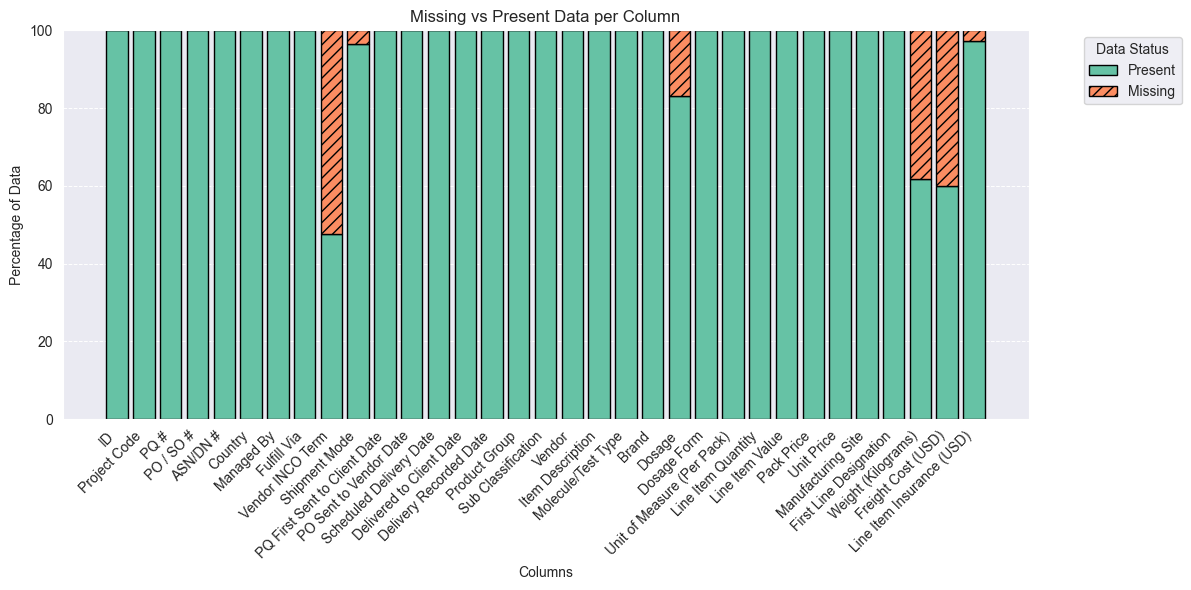

In [17]:
# visualise the change
visualise_missing_val(df)

In [18]:
# converting date columns to datetime & handling the noise
date_cols = ['PQ First Sent to Client Date',
            'PO Sent to Vendor Date',
            'Scheduled Delivery Date',
            'Delivered to Client Date',
            'Delivery Recorded Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print(unique_per_cent(df))

C:\Users\Hp\AppData\Local\Temp\ipykernel_17812\2637357988.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Hp\AppData\Local\Temp\ipykernel_17812\2637357988.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Hp\AppData\Local\Temp\ipykernel_17812\2637357988.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Hp\AppData\Local\Temp\ipykernel_17812\2637357988.py:9: UserWarning: Could not infer form

                              Missing Values  Missing Values (%)
ID                                         0               0.000
Project Code                               0               0.000
PQ #                                       0               0.000
PO / SO #                                  0               0.000
ASN/DN #                                   0               0.000
Country                                    0               0.000
Managed By                                 0               0.000
Fulfill Via                                0               0.000
Vendor INCO Term                        5404              52.340
Shipment Mode                            360               3.490
PQ First Sent to Client Date            2681              25.970
PO Sent to Vendor Date                  5732              55.520
Scheduled Delivery Date                    0               0.000
Delivered to Client Date                   0               0.000
Delivery Recorded Date   

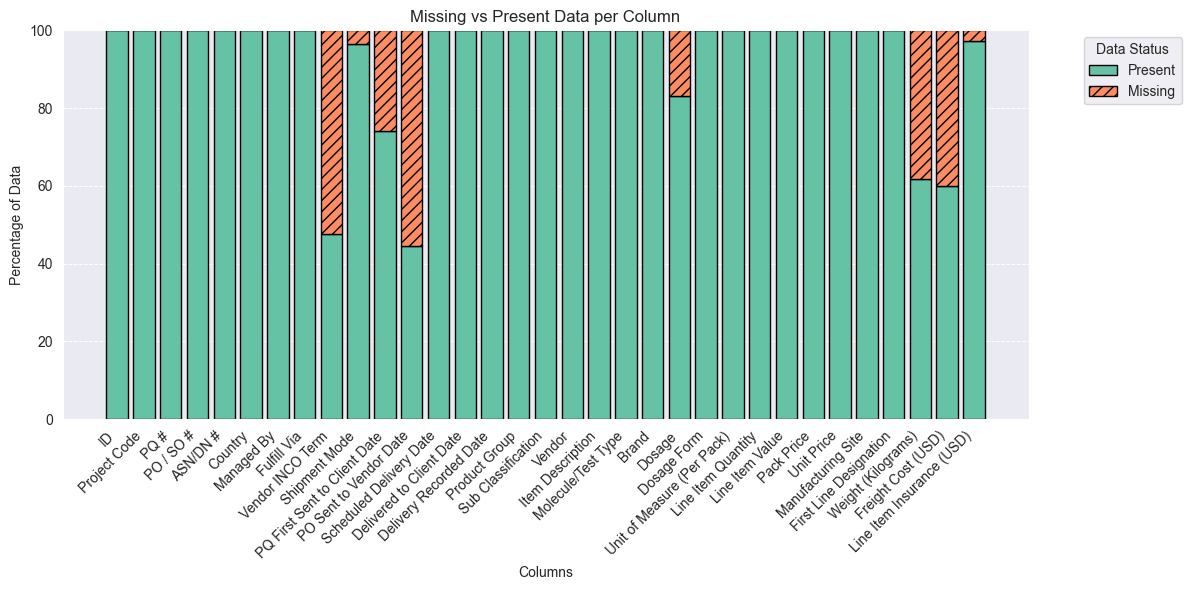

In [19]:
visualise_missing_val(df)

Some columns have more than 40%-50% missing values  
Dropping the ones with missing values >50%  
Simple imputation won't work for the rest lest we introduce some more bias

In [20]:
# drop the columns with a hige gap in values
df.drop(['Vendor INCO Term', 'PO Sent to Vendor Date'], axis=1, inplace=True)

## Missing values

Imputing the missing values in each column one by one

### columns: Shipment Mode, Line Item Insurance

In [21]:
'''
since they have <5% missing values
simple imputation works best here
'''

df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].median(), inplace=True) # impute with median
df['Shipment Mode'].fillna(df['Shipment Mode'].mode()[0], inplace=True) # impute with mode

print(unique_per_cent(df)) # check the final %tage

                              Missing Values  Missing Values (%)
ID                                         0               0.000
Project Code                               0               0.000
PQ #                                       0               0.000
PO / SO #                                  0               0.000
ASN/DN #                                   0               0.000
Country                                    0               0.000
Managed By                                 0               0.000
Fulfill Via                                0               0.000
Shipment Mode                              0               0.000
PQ First Sent to Client Date            2681              25.970
Scheduled Delivery Date                    0               0.000
Delivered to Client Date                   0               0.000
Delivery Recorded Date                     0               0.000
Product Group                              0               0.000
Sub Classification       

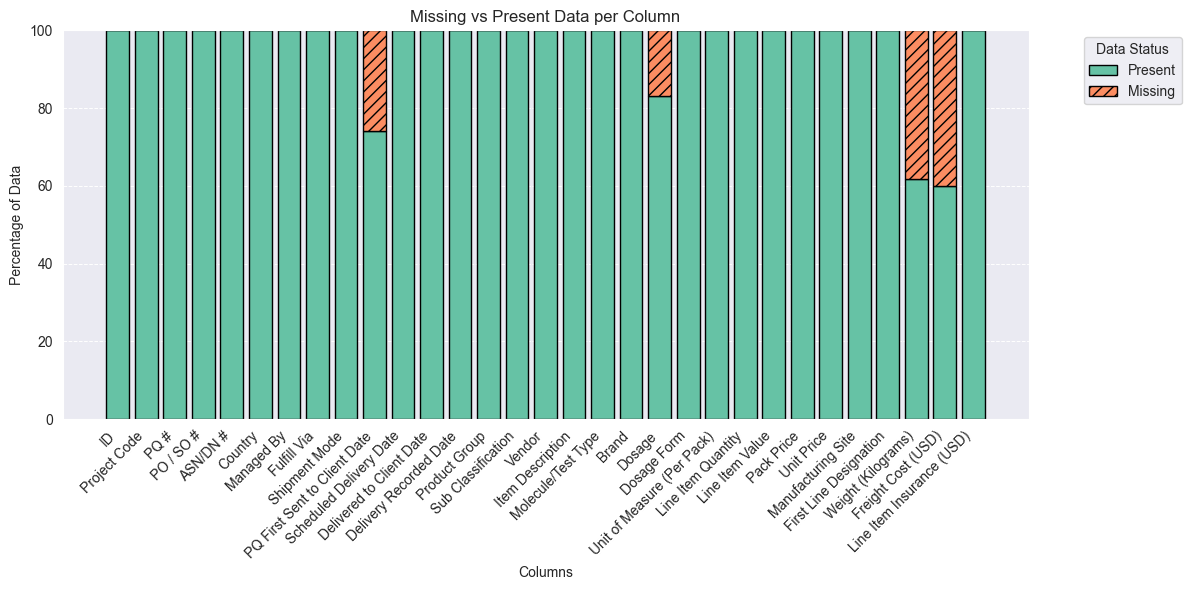

In [22]:
visualise_missing_val(df)

### column: Dosage

In [23]:
'''
print all the unique values of dosage column
to see what we're dealing with here
'''
print(df['Dosage'].unique())

[nan '10mg/ml' '150mg' '30mg' '200mg' '200/50mg' '150/300mg' '2g' '300mg'
 '1mg/ml' '600mg' '25mg' '20mg' '250mg' '400mg' '20/120mg' '50+153mg'
 '600/200/300mg' '100mg' '80/20mg/ml' '600mg/2ml' '150/200/30mg'
 '100/25mg' '50mg' '15mg' '300/200mg' '150/300/200mg' '133.3/33.3mg'
 '80mg/ml' '30/6mg' '20mg/ml' '40mg' '300/150/300mg' '500/25mg'
 '30/50/6mg' '150/300+200mg' '150/30mg' '150/200/40mg' '30mg/ml'
 '200/300mg' '150/300+300mg' '300/300mg' '60/100/12mg' '600/300/300mg'
 '300/100mg' '30/60mg' '60/30mg' '30/50/60mg' '500mg' '125mg' '600/300mg'
 '60mg' '60/12mg' '150/300mg+600mg' '50mg/g']


Since the units are all over the place  
We need a way to generalise this  
We can use regex for this task

In [24]:
'''
this func tackles all the possible units one by one
extract & return the mg value
'''
def extract_mg_fixed(dosage):
    if pd.isna(dosage):
        return np.nan
    
    # only match gram values that end with 'g' not preceded by 'm' or other characters
    if isinstance(dosage, str) and re.search(r'(\d+(?:\.\d+)?)g\b', dosage) and not '/g' in dosage:
        g_value = re.search(r'(\d+(?:\.\d+)?)g\b', dosage).group(1)
        return float(g_value) * 1000
    
    # for all other values, extract the first number before "mg"
    if isinstance(dosage, str) and 'mg' in dosage:
        match = re.search(r'(\d+(?:\.\d+)?)', dosage)
        if match:
            return float(match.group(1))
    
    # last resort - just get the first number
    if isinstance(dosage, str):
        match = re.search(r'(\d+(?:\.\d+)?)', dosage)
        if match:
            return float(match.group(1))
    
    return np.nan

df['dosage_mg'] = df['Dosage'].apply(extract_mg_fixed) # create a new column & apply the func on it

pd.set_option('display.float_format', '{:.2f}'.format)
print(unique_per_cent(df))

                              Missing Values  Missing Values (%)
ID                                         0                0.00
Project Code                               0                0.00
PQ #                                       0                0.00
PO / SO #                                  0                0.00
ASN/DN #                                   0                0.00
Country                                    0                0.00
Managed By                                 0                0.00
Fulfill Via                                0                0.00
Shipment Mode                              0                0.00
PQ First Sent to Client Date            2681               25.97
Scheduled Delivery Date                    0                0.00
Delivered to Client Date                   0                0.00
Delivery Recorded Date                     0                0.00
Product Group                              0                0.00
Sub Classification       

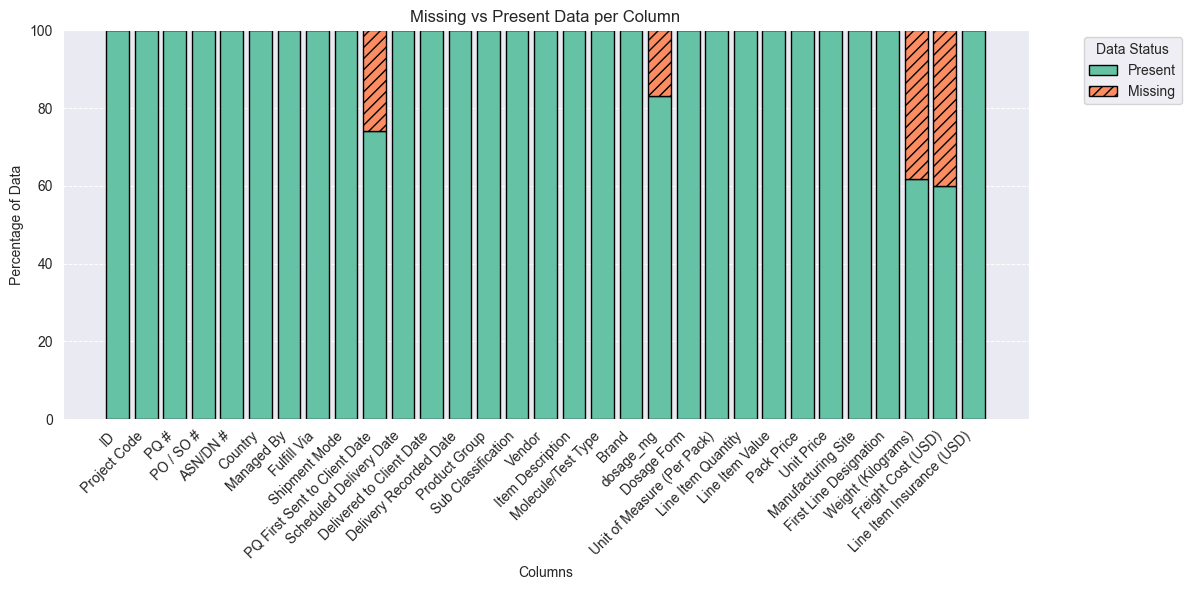

In [25]:
move = df.pop('dosage_mg')
df.insert(19, 'dosage_mg', move)

df.drop('Dosage', axis=1, inplace=True)

visualise_missing_val(df)

Values are converted to numeric form.  
We can impute them now.  

We can impute the missing values with grouped median.  

To find which column is the best to group the values by-  
We can divide the ```dosage_mg``` column into missing & known values,  
Then check which other column has the largest overlap between the two groups  
Grouping by that column ought to give us median values to impute all the missing values of ```dosage_mg```

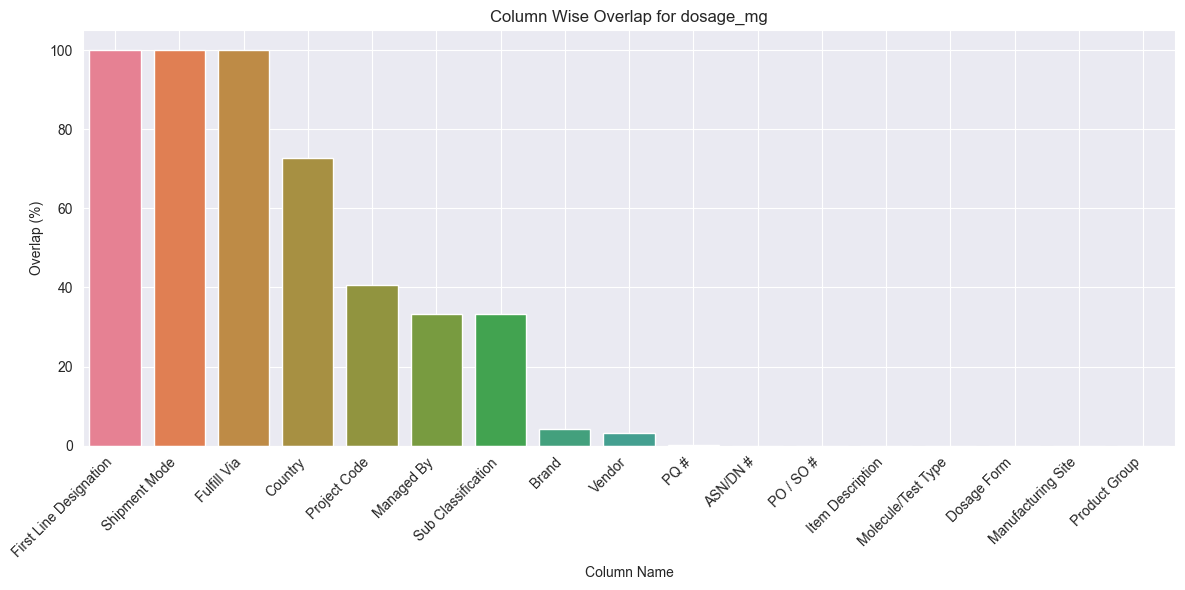

In [27]:
def compute_overlap_scores(df, cat_columns, target_col):
    # identify categorical columns
    
    overlap_scores = []

    for col in cat_columns:
        known_vals = set(df.loc[~df[target_col].isna(), col].dropna().unique())
        missing_vals = set(df.loc[df[target_col].isna(), col].dropna().unique())
        overlap = len(known_vals & missing_vals)
        total_missing_vals = len(missing_vals)
        percent_overlap = (overlap / total_missing_vals * 100) if total_missing_vals else 0
        overlap_scores.append((col, percent_overlap, overlap, total_missing_vals))

    # convert to DataFrame for easier viewing
    overlap_df = pd.DataFrame(overlap_scores, columns=['Column', 'Percent Overlap', 'Shared Values', 'Missing-Side Unique Values'])
    overlap_df.sort_values(by='Percent Overlap', ascending=False, inplace=True)
    overlap_df.reset_index(drop=True, inplace=True)

    # plotting the bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x='Column', y='Percent Overlap', hue='Column', data=overlap_df, ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set(title=f'Column Wise Overlap for {target_col}',
           xlabel='Column Name',
           ylabel='Overlap (%)')
    ax.grid(True)
    plt.tight_layout()
    plt.show()

cat_columns = df.select_dtypes(include='object').columns.tolist()
compute_overlap_scores(df, cat_columns, 'dosage_mg')

The columns with 100% overlap are
-```*First Line Designatio```*
``` *Shipment Mo```e*```- *Fulfill ```ia*

This means that grouping by these columns wouldn't isolate the NaN values into seperate groups  
Within the contexual logic, none of them seem to effect the dosage of any particular test, vaccine  
But since these are statiscally the best columns so I'm moving ahead ```Shipment Mode```Mode'***Mode'***Mode'***ode'***

In [28]:
# calculate median dosage for each Shipment Mode group
mode_medians = df.groupby('Shipment Mode')['dosage_mg'].median()

# define a function that fills in missing dosage using the group median
def impute_dosage_mg(row):
    if pd.isna(row['dosage_mg']):
        return mode_medians.get(row['Shipment Mode'], np.nan)
    else:
        return row['dosage_mg']

# apply that function row-wise across the DataFrame
df['dosage_mg'] = df.apply(impute_dosage_mg, axis=1)

# check how many missing values are left
print(unique_per_cent(df)) # check if it worked

                              Missing Values  Missing Values (%)
ID                                         0                0.00
Project Code                               0                0.00
PQ #                                       0                0.00
PO / SO #                                  0                0.00
ASN/DN #                                   0                0.00
Country                                    0                0.00
Managed By                                 0                0.00
Fulfill Via                                0                0.00
Shipment Mode                              0                0.00
PQ First Sent to Client Date            2681               25.97
Scheduled Delivery Date                    0                0.00
Delivered to Client Date                   0                0.00
Delivery Recorded Date                     0                0.00
Product Group                              0                0.00
Sub Classification       

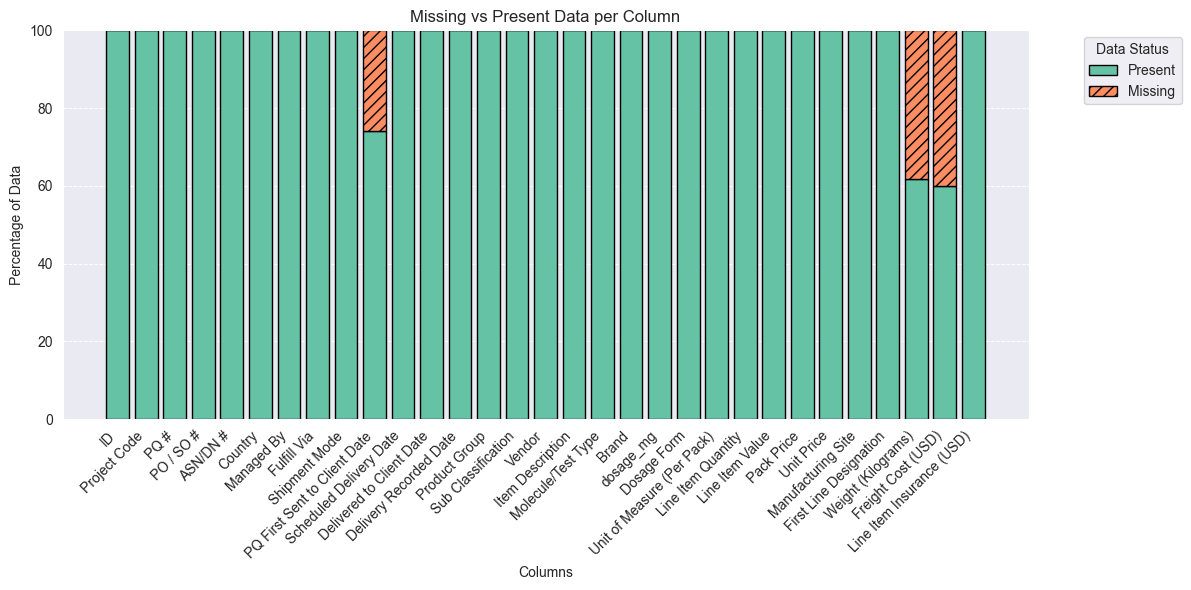

In [29]:
visualise_missing_val(df)

### column: PQ Date

In [30]:
# rename the column for easier access
df.rename(columns={'PQ First Sent to Client Date': 'pq_date'}, inplace=True)
df.rename(columns={'Delivered to Client Date': 'delivery_date'}, inplace=True)

print(unique_per_cent(df))

                            Missing Values  Missing Values (%)
ID                                       0                0.00
Project Code                             0                0.00
PQ #                                     0                0.00
PO / SO #                                0                0.00
ASN/DN #                                 0                0.00
Country                                  0                0.00
Managed By                               0                0.00
Fulfill Via                              0                0.00
Shipment Mode                            0                0.00
pq_date                               2681               25.97
Scheduled Delivery Date                  0                0.00
delivery_date                            0                0.00
Delivery Recorded Date                   0                0.00
Product Group                            0                0.00
Sub Classification                       0             

Since pq_date is a datetime column, we need an indirect way to impute it.

Making a new numerical column called ```gap_to_delivery```, it will have the no of days between the pq_date & delivery_date.  
```gap_to_delivery``` will share the 25% missing proportion of ```pq_date```  
and this missing 25% is what I'll try to impute.

Once all the values in ```gap_to_delivery``` are accounted for  
I'll subtract these new values from ```delivery_date```, and I'll get final imputed values for ```pq_date``` with consistent datatype

For ```gap_todelivery``` column to be consistent, we need to ensure that there is a positive gap between the two events.

That is, every ```delivery_date``` happens *after* the ```pq_date```

In [31]:
# print the distribution of +ve, -ve & 0 gap
def compare_event_order(df, col1, col2):
    # drop rows where either date is missing
    valid = df[[col1, col2]].dropna()

    total = len(valid)
    if total == 0:
        print("No valid comparisons possible.")
        return

    before = (valid[col1] < valid[col2]).sum()
    after = (valid[col1] > valid[col2]).sum()
    equal = (valid[col1] == valid[col2]).sum()

    print(f"Total valid comparisons: {total}")
    print(f"{(before/total)*100:.2f}% - {col1} is before {col2}")
    print(f"{(after/total)*100:.2f}% - {col1} is after {col2}")
    print(f"{(equal/total)*100:.2f}% - {col1} is equal to {col2}")

compare_event_order(df, 'pq_date', 'delivery_date')

Total valid comparisons: 7643
99.87% - pq_date is before delivery_date
0.13% - pq_date is after delivery_date
0.00% - pq_date is equal to delivery_date


In [32]:
# adding new col: gap_to_delivery
df['gap_to_delivery'] = (df['pq_date'] - df['delivery_date']).abs().dt.days

df['gap_to_delivery'].unique

<bound method Series.unique of 0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
10319   272.00
10320   286.00
10321   378.00
10322    34.00
10323   292.00
Name: gap_to_delivery, Length: 10324, dtype: float64>

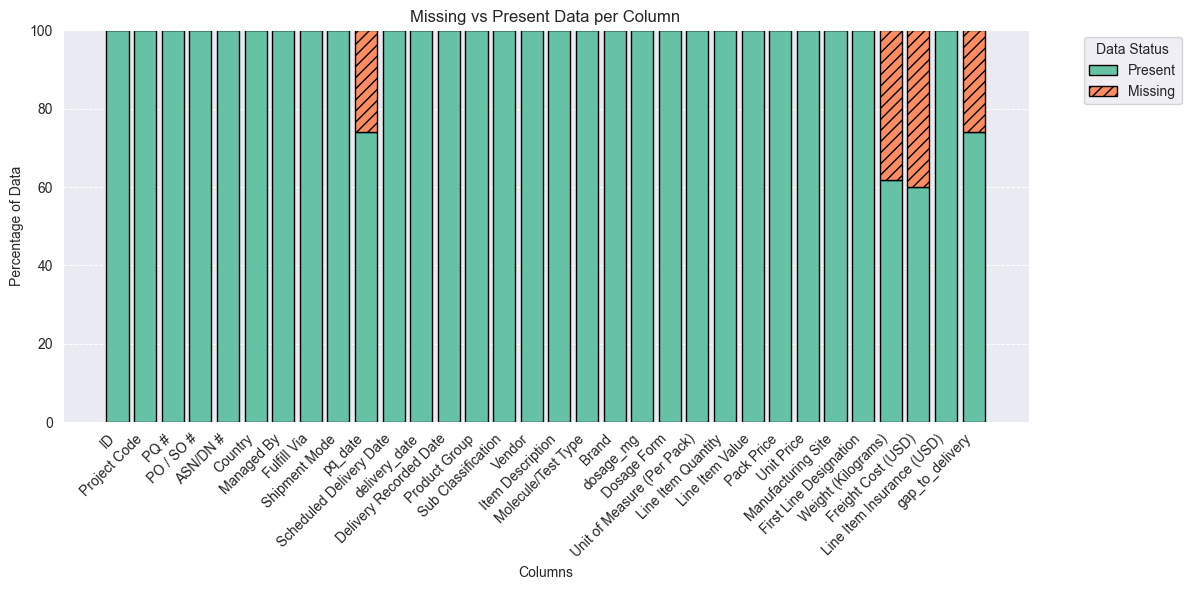

In [33]:
visualise_missing_val(df)

Now, to impute ```gat_to_delivery```, I'm thinking of using the same methodology I used for ```dosage_mg```

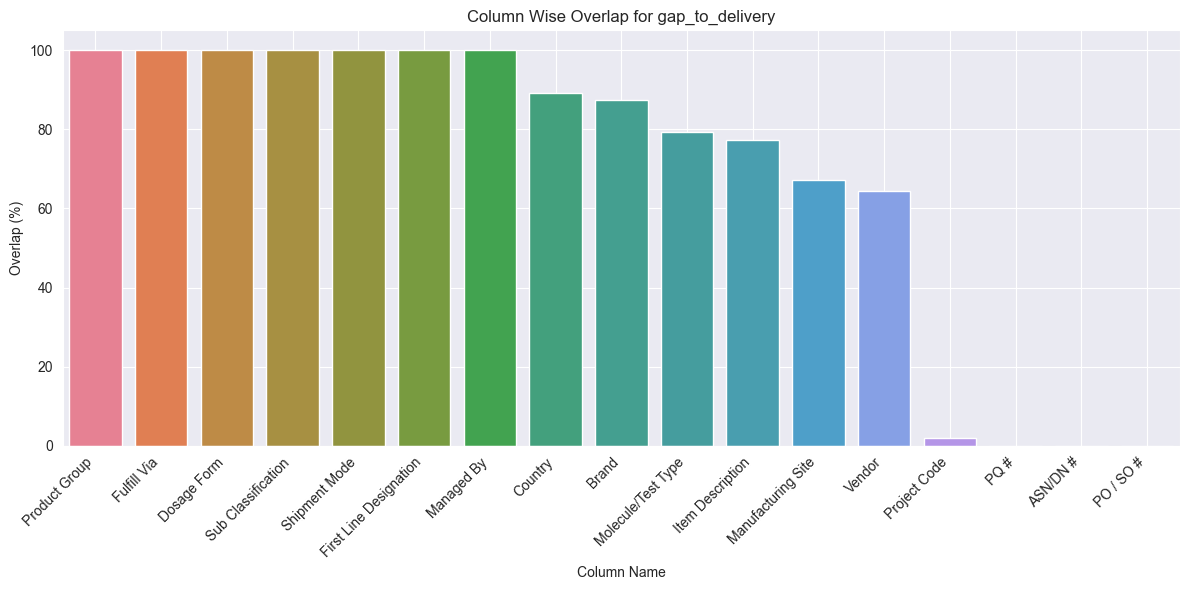

In [34]:
# visualise the overlap scores of all the categorical columns for gap_to_delivery
cat_columns = df.select_dtypes(include='object').columns.tolist()
compute_overlap_scores(df, cat_columns, 'gap_to_delivery')

I'll go ahead with ```Sub Classification``` column, it has 6 unique values

In [35]:
# calculate mediangap days for each Sub Classification group
sub_medians = df.groupby('Sub Classification')['gap_to_delivery'].median()

# define a function that fills in missing dosage using the group median
def impute_gap_days(row):
    if pd.isna(row['gap_to_delivery']):
        return sub_medians.get(row['Sub Classification'], np.nan)
    else:
        return row['gap_to_delivery']

# apply that function row-wise across the DataFrame
df['gap_to_delivery'] = df.apply(impute_gap_days, axis=1)

print(unique_per_cent(df))

                            Missing Values  Missing Values (%)
ID                                       0                0.00
Project Code                             0                0.00
PQ #                                     0                0.00
PO / SO #                                0                0.00
ASN/DN #                                 0                0.00
Country                                  0                0.00
Managed By                               0                0.00
Fulfill Via                              0                0.00
Shipment Mode                            0                0.00
pq_date                               2681               25.97
Scheduled Delivery Date                  0                0.00
delivery_date                            0                0.00
Delivery Recorded Date                   0                0.00
Product Group                            0                0.00
Sub Classification                       0             

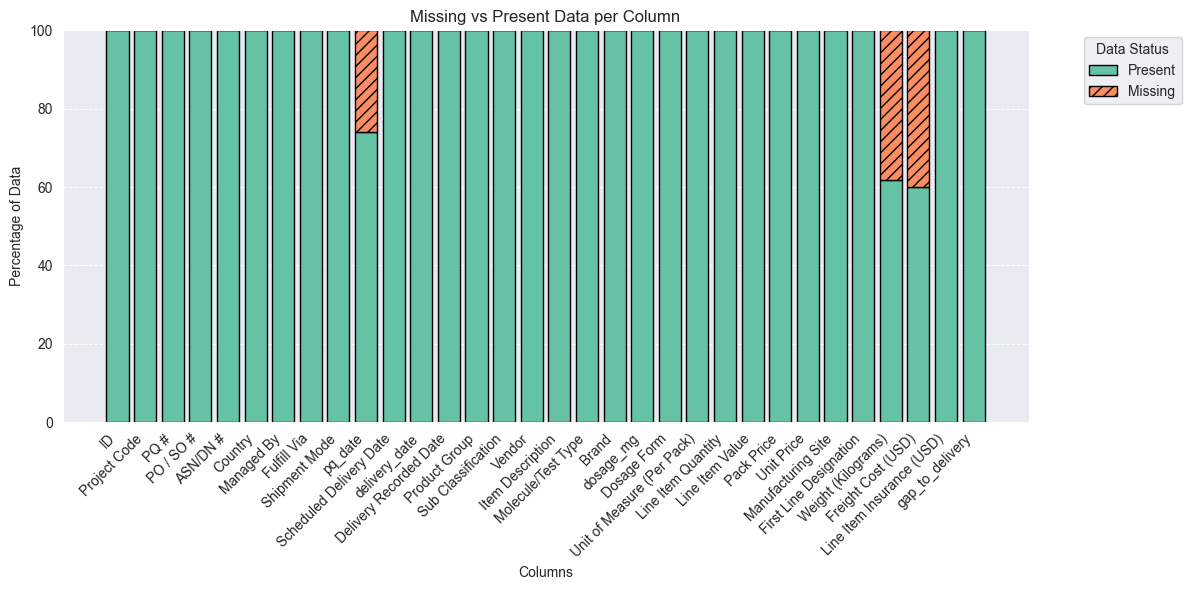

In [36]:
visualise_missing_val(df)

```gap_to_delivery``` is fully imputed, we can use it to calculate the missing ```pq_date``` values

In [37]:
# filtering the rows with missing pq_date value
mask = df['pq_date'].isna() & df['gap_to_delivery'].notna()

# subtraction
df.loc[mask, 'pq_date'] = df.loc[mask, 'delivery_date'] - pd.to_timedelta(df.loc[mask, 'gap_to_delivery'], unit='D')

print(unique_per_cent(df))

                            Missing Values  Missing Values (%)
ID                                       0                0.00
Project Code                             0                0.00
PQ #                                     0                0.00
PO / SO #                                0                0.00
ASN/DN #                                 0                0.00
Country                                  0                0.00
Managed By                               0                0.00
Fulfill Via                              0                0.00
Shipment Mode                            0                0.00
pq_date                                  0                0.00
Scheduled Delivery Date                  0                0.00
delivery_date                            0                0.00
Delivery Recorded Date                   0                0.00
Product Group                            0                0.00
Sub Classification                       0             

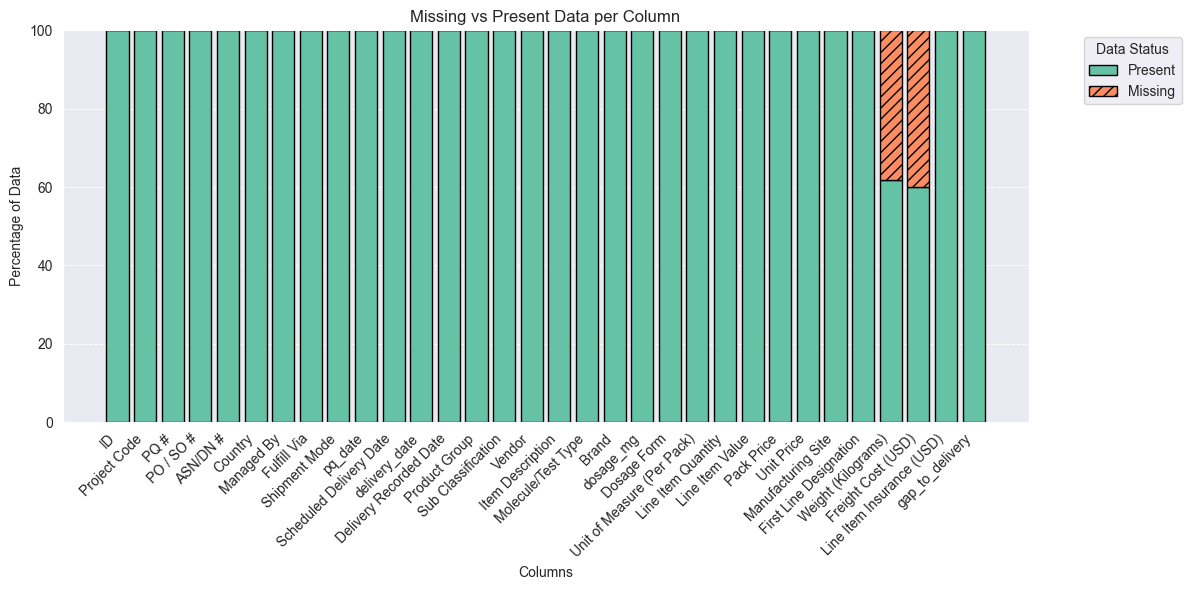

In [38]:
visualise_missing_val(df)

column PO Date successfully imputed

### column: Weight

change the name of the column  
from ```Weight (Kilograms)``` to just ```weight_kg```  
for ease of use

In [39]:
df.rename(columns={'Weight (Kilograms)': 'weight_kg'}, inplace=True) # changes the name

print(unique_per_cent(df)) # check

                            Missing Values  Missing Values (%)
ID                                       0                0.00
Project Code                             0                0.00
PQ #                                     0                0.00
PO / SO #                                0                0.00
ASN/DN #                                 0                0.00
Country                                  0                0.00
Managed By                               0                0.00
Fulfill Via                              0                0.00
Shipment Mode                            0                0.00
pq_date                                  0                0.00
Scheduled Delivery Date                  0                0.00
delivery_date                            0                0.00
Delivery Recorded Date                   0                0.00
Product Group                            0                0.00
Sub Classification                       0             

I'll use the same strategy:
1. calculate the overlap scores of all the categorical columns with respect to the missing values in ```weight_kg```
2. group the dataset by the column with the highest overlap score
       - incase of a tie, check for the quality of each column
3. impute the missing values in every group with the group's median

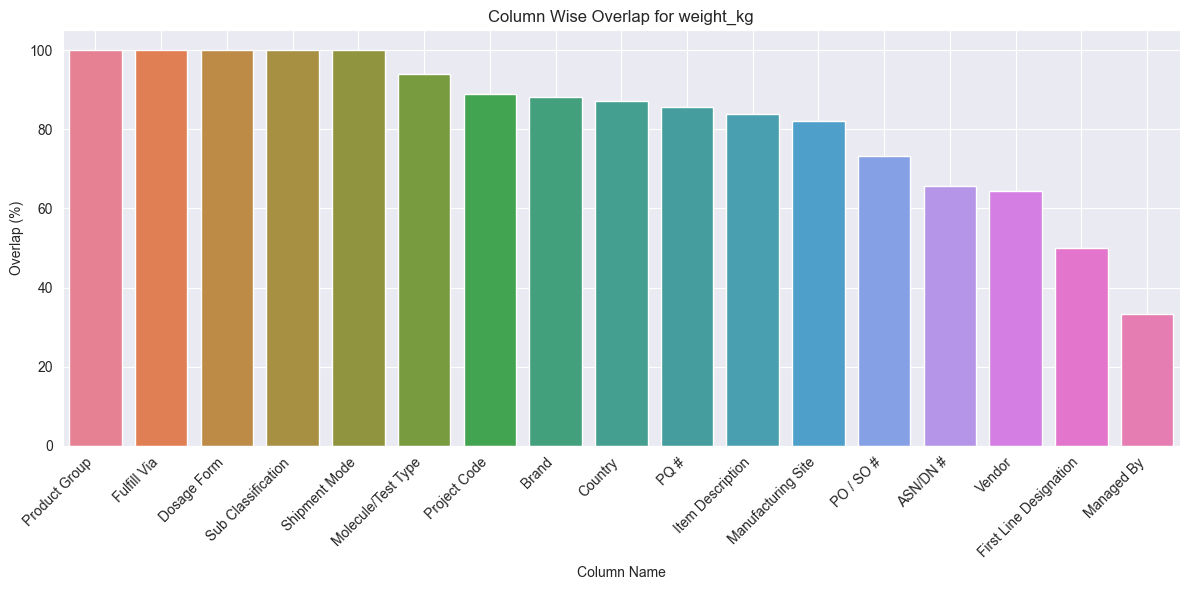

In [40]:
# overlap scores of each categorical column for weight_kg
cat_columns = df.select_dtypes(include='object').columns.tolist()
compute_overlap_scores(df, cat_columns, 'weight_kg')

```Product Group``` has 5 unique values, ```Dosage Form``` has 17 unique values  
I'm going forward with the former

In [41]:
# calculate median weights for each Product Group
grp_medians = df.groupby('Product Group')['weight_kg'].median()

# define a function that fills in missing dosage using the group median
def impute_weight(row):
    if pd.isna(row['weight_kg']):
        return grp_medians.get(row['Product Group'], np.nan)
    else:
        return row['weight_kg']

# apply that function row-wise across the DataFrame
df['weight_kg'] = df.apply(impute_weight, axis=1)

print(unique_per_cent(df)) # check if all the values are imputed or not

                            Missing Values  Missing Values (%)
ID                                       0                0.00
Project Code                             0                0.00
PQ #                                     0                0.00
PO / SO #                                0                0.00
ASN/DN #                                 0                0.00
Country                                  0                0.00
Managed By                               0                0.00
Fulfill Via                              0                0.00
Shipment Mode                            0                0.00
pq_date                                  0                0.00
Scheduled Delivery Date                  0                0.00
delivery_date                            0                0.00
Delivery Recorded Date                   0                0.00
Product Group                            0                0.00
Sub Classification                       0             

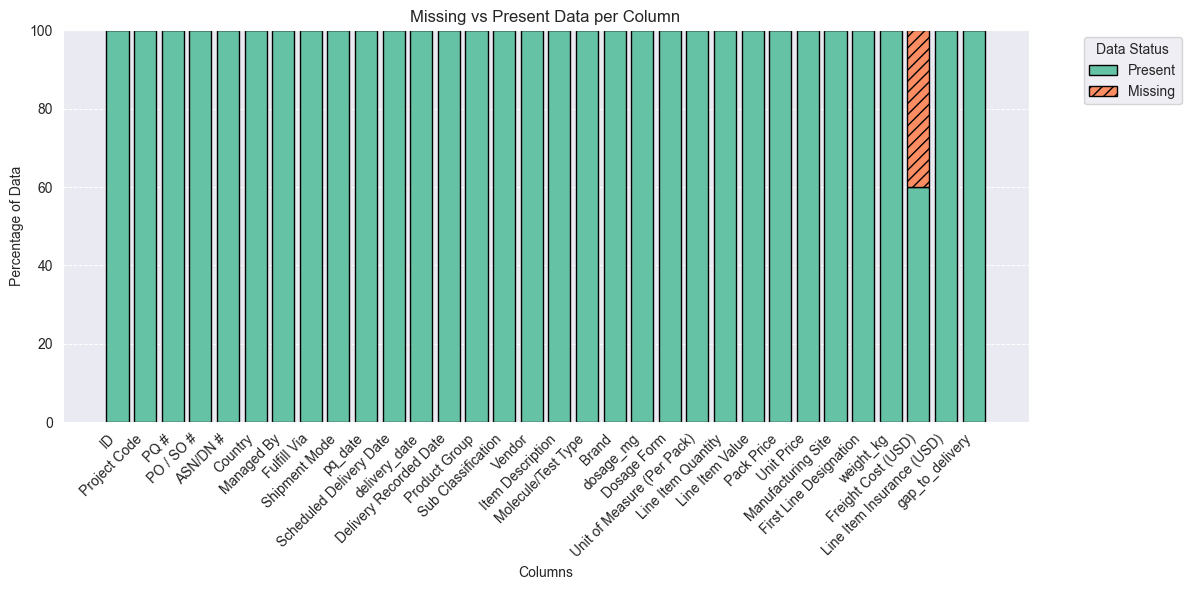

In [42]:
visualise_missing_val(df)

column ```weight_kg``` successfully imputed

### column: Freight Cost

changing the name of the column  
from ```Freight Cost (USD)``` to ```cost_usd```  
for ease of use

In [43]:
df.rename(columns={'Freight Cost (USD)': 'cost_usd'}, inplace=True) # changes the name

print(unique_per_cent(df)) # check

                            Missing Values  Missing Values (%)
ID                                       0                0.00
Project Code                             0                0.00
PQ #                                     0                0.00
PO / SO #                                0                0.00
ASN/DN #                                 0                0.00
Country                                  0                0.00
Managed By                               0                0.00
Fulfill Via                              0                0.00
Shipment Mode                            0                0.00
pq_date                                  0                0.00
Scheduled Delivery Date                  0                0.00
delivery_date                            0                0.00
Delivery Recorded Date                   0                0.00
Product Group                            0                0.00
Sub Classification                       0             

Again, the same strategy

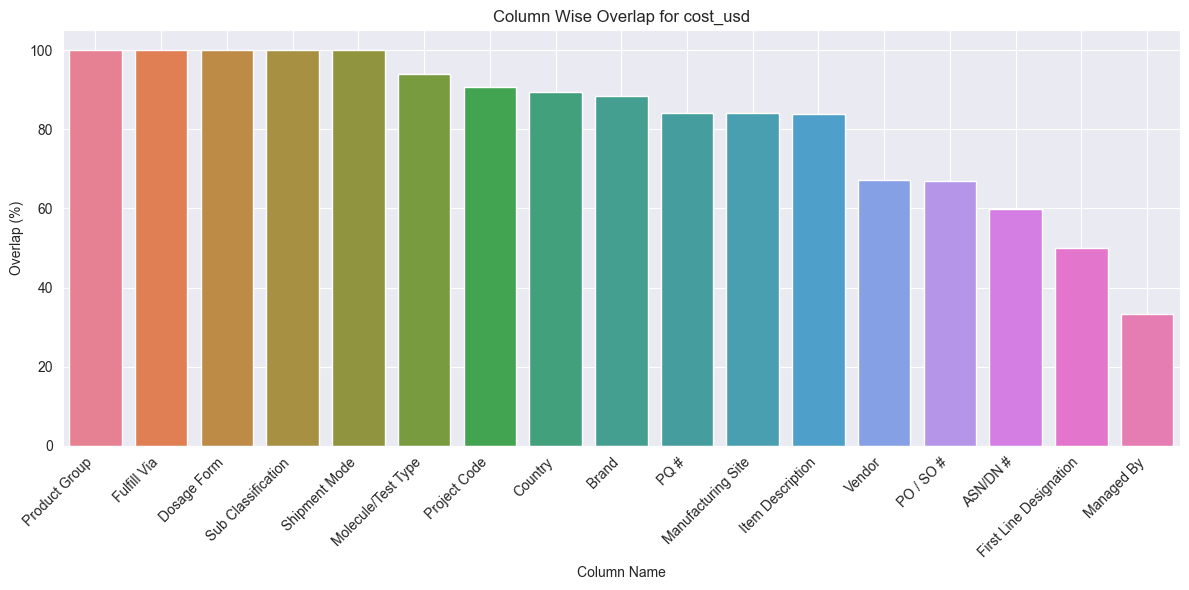

In [44]:
# visualise the overlap score of all categorical columns with cost_usd
cat_columns = df.select_dtypes(include='object').columns.tolist()
compute_overlap_scores(df, cat_columns, 'cost_usd')

I'll go ahead with ```Dosage Form```, it has 17 unique values

In [45]:
# calculate median cost for each Dosage Form
form_medians = df.groupby('Dosage Form')['cost_usd'].median()

# define a function that fills in missing dosage using the group median
def impute_cost(row):
    if pd.isna(row['cost_usd']):
        return form_medians.get(row['Dosage Form'], np.nan)
    else:
        return row['cost_usd']

# apply that function row-wise across the DataFrame
df['cost_usd'] = df.apply(impute_cost, axis=1)

print(unique_per_cent(df))

                            Missing Values  Missing Values (%)
ID                                       0                0.00
Project Code                             0                0.00
PQ #                                     0                0.00
PO / SO #                                0                0.00
ASN/DN #                                 0                0.00
Country                                  0                0.00
Managed By                               0                0.00
Fulfill Via                              0                0.00
Shipment Mode                            0                0.00
pq_date                                  0                0.00
Scheduled Delivery Date                  0                0.00
delivery_date                            0                0.00
Delivery Recorded Date                   0                0.00
Product Group                            0                0.00
Sub Classification                       0             

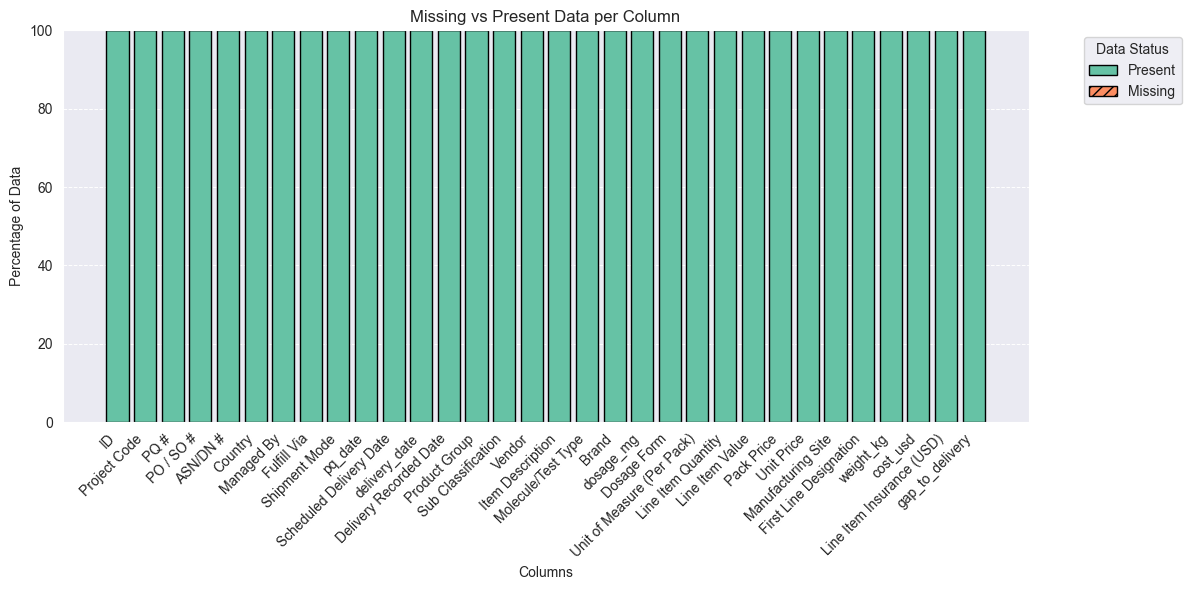

In [46]:
visualise_missing_val(df)

Succesfully imputed all the columns

# Exploratory Data Analysis

This is where we begin the data analysis

we'll drop the columns that dont bring any contexual significance to the dataset  
columns such as:
- ```ID```
- ```Project Code```
- ```PQ #```
- ```PO / PQ #```
- ```ASN/DN #```

In [47]:
# dropping columns
df.drop(columns=['ID',
                 'Project Code',
                 'PQ #',
                 'PO / SO #',
                 'ASN/DN #'],
        axis=1,
        inplace=True)

I'll divide the dataframe into two groups based on numerical & categorical columns.  
Just so that working with them is easier

In [48]:
# dividng
num_df = df.select_dtypes(include=['number'])
cat_df = df.select_dtypes(include=['object'])
date_df = df.select_dtypes(include=['datetime', 'datetime64'])

num_df['delivery_delay_days'] = (df['delivery_date'] - df['Scheduled Delivery Date']).abs().dt.days # adding the delay in delivery as another column

# displaying column names in each sub df
col_types = {
    'numerical': pd.Series(num_df.columns),
    'categorical': pd.Series(cat_df.columns),
    'datetime': pd.Series(date_df.columns)
}
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in col_types.items()]))

numerical             categorical                 datetime
0                    dosage_mg                 Country                  pq_date
1   Unit of Measure (Per Pack)              Managed By  Scheduled Delivery Date
2           Line Item Quantity             Fulfill Via            delivery_date
3              Line Item Value           Shipment Mode   Delivery Recorded Date
4                   Pack Price           Product Group                      NaN
5                   Unit Price      Sub Classification                      NaN
6                    weight_kg                  Vendor                      NaN
7                     cost_usd        Item Description                      NaN
8    Line Item Insurance (USD)      Molecule/Test Type                      NaN
9              gap_to_delivery                   Brand                      NaN
10         delivery_delay_days             Dosage Form                      NaN
11                         NaN      Manufacturing Site                      NaN
12                         NaN  First Line Designation                      NaN

## Univariate Analysis

This is where we gain statistical insights about each column

### Numerical columns

I'll use various graphs to get more insights about each numerical column in our dataset

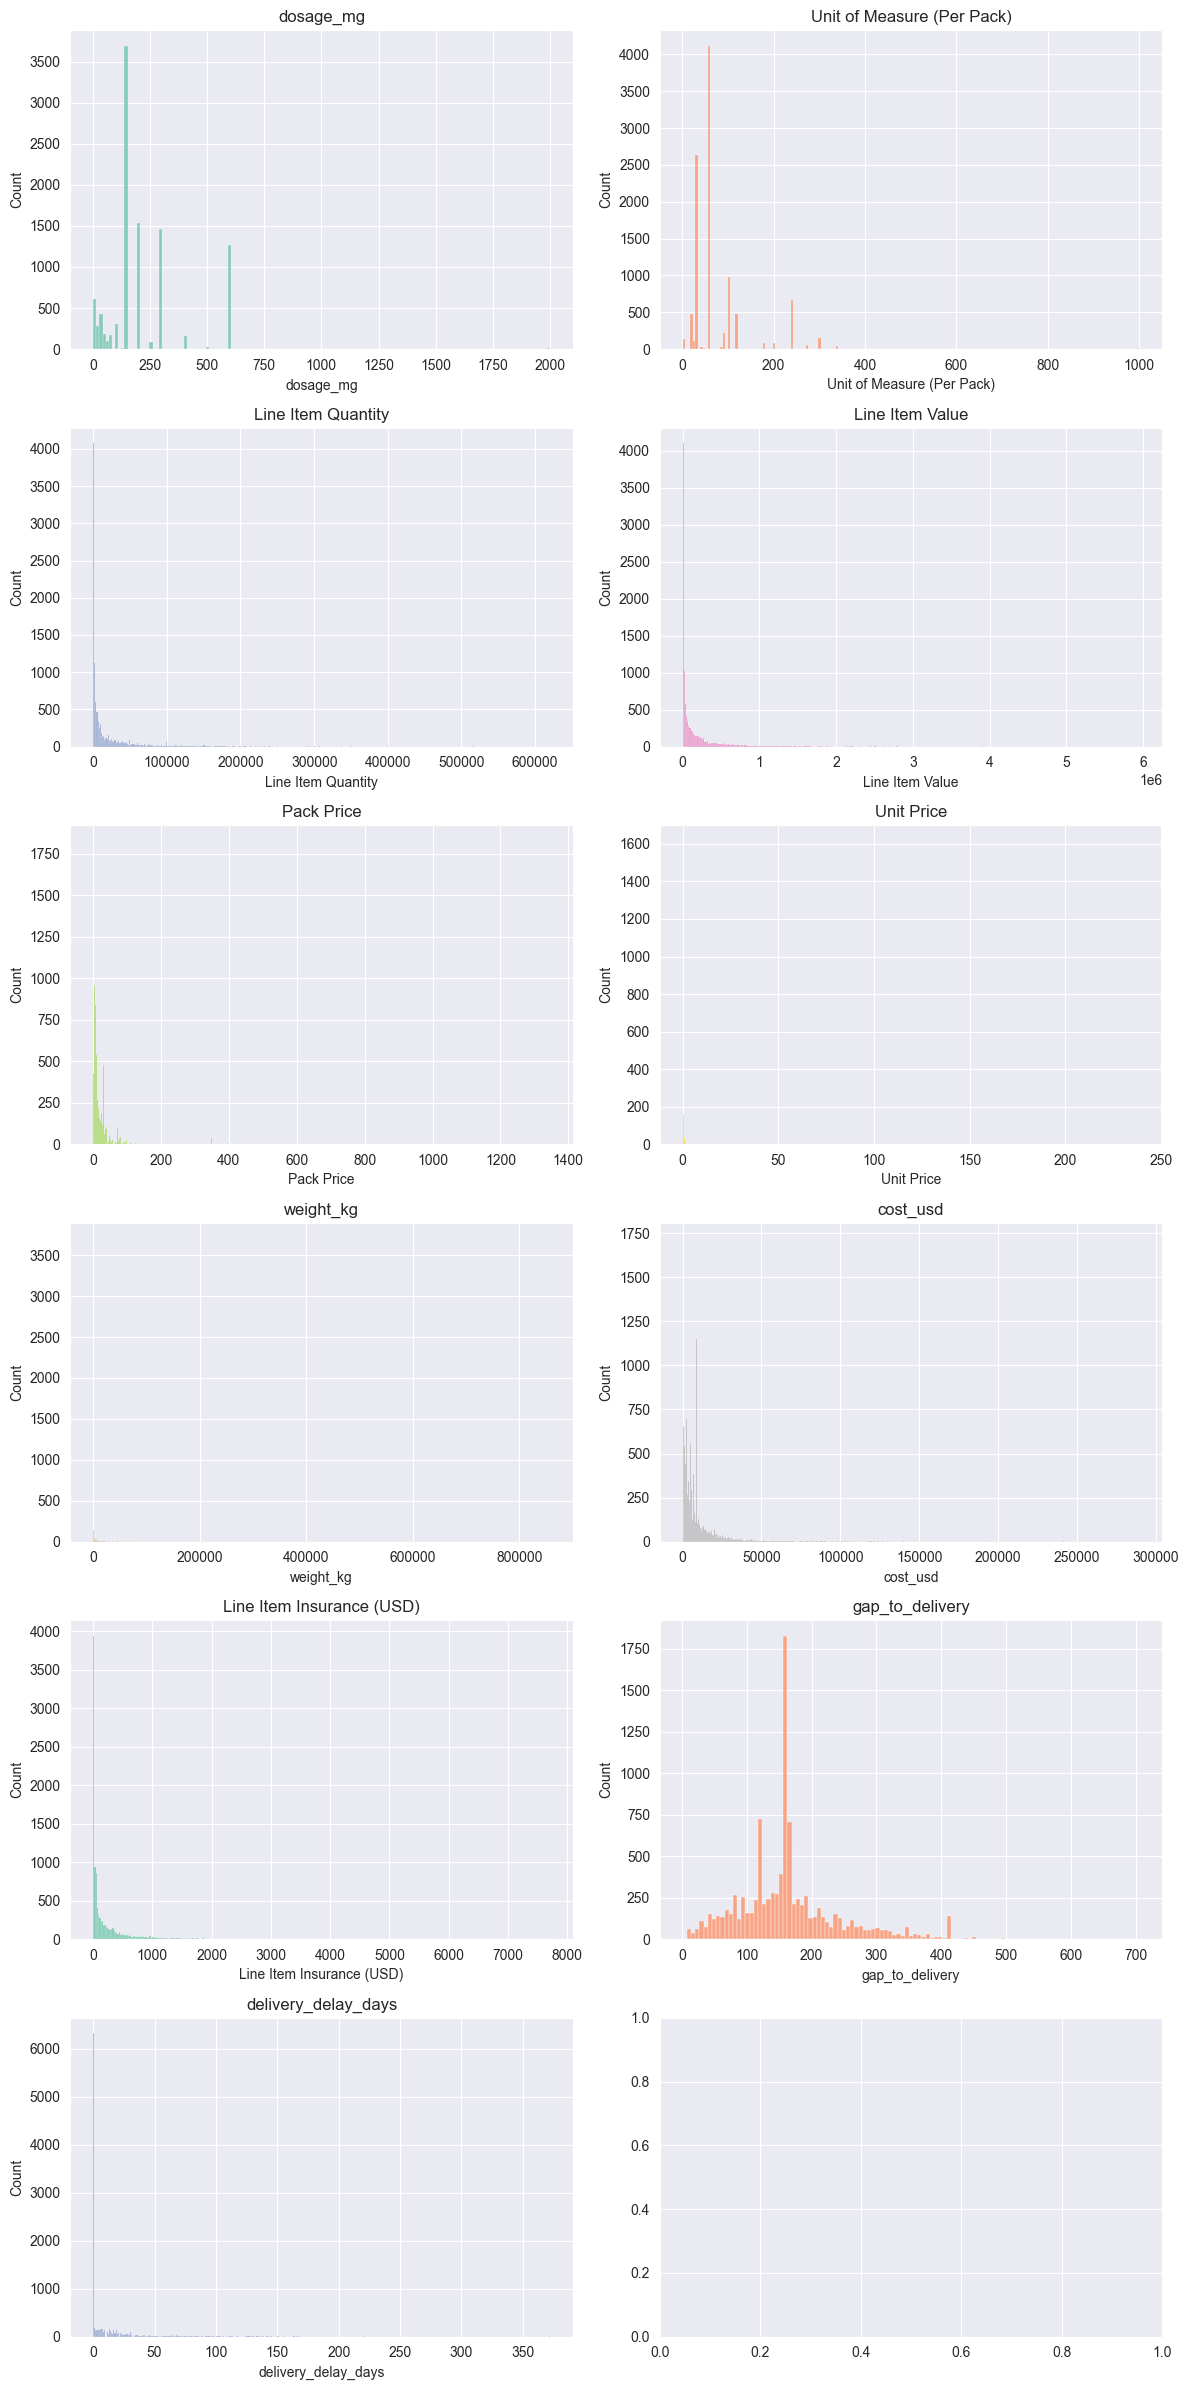

In [49]:
# plotting frequency distribution of all the numerical cols

fig, axes = plt.subplots(6, 2, figsize=(12, 24)) # this will form a 6x2 grid
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    sns.histplot(data=num_df, x=col, ax=axes[i], color=sns.color_palette("Set2", 11)[i]) 
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Data is highly skewed, trying a logarithimic scale

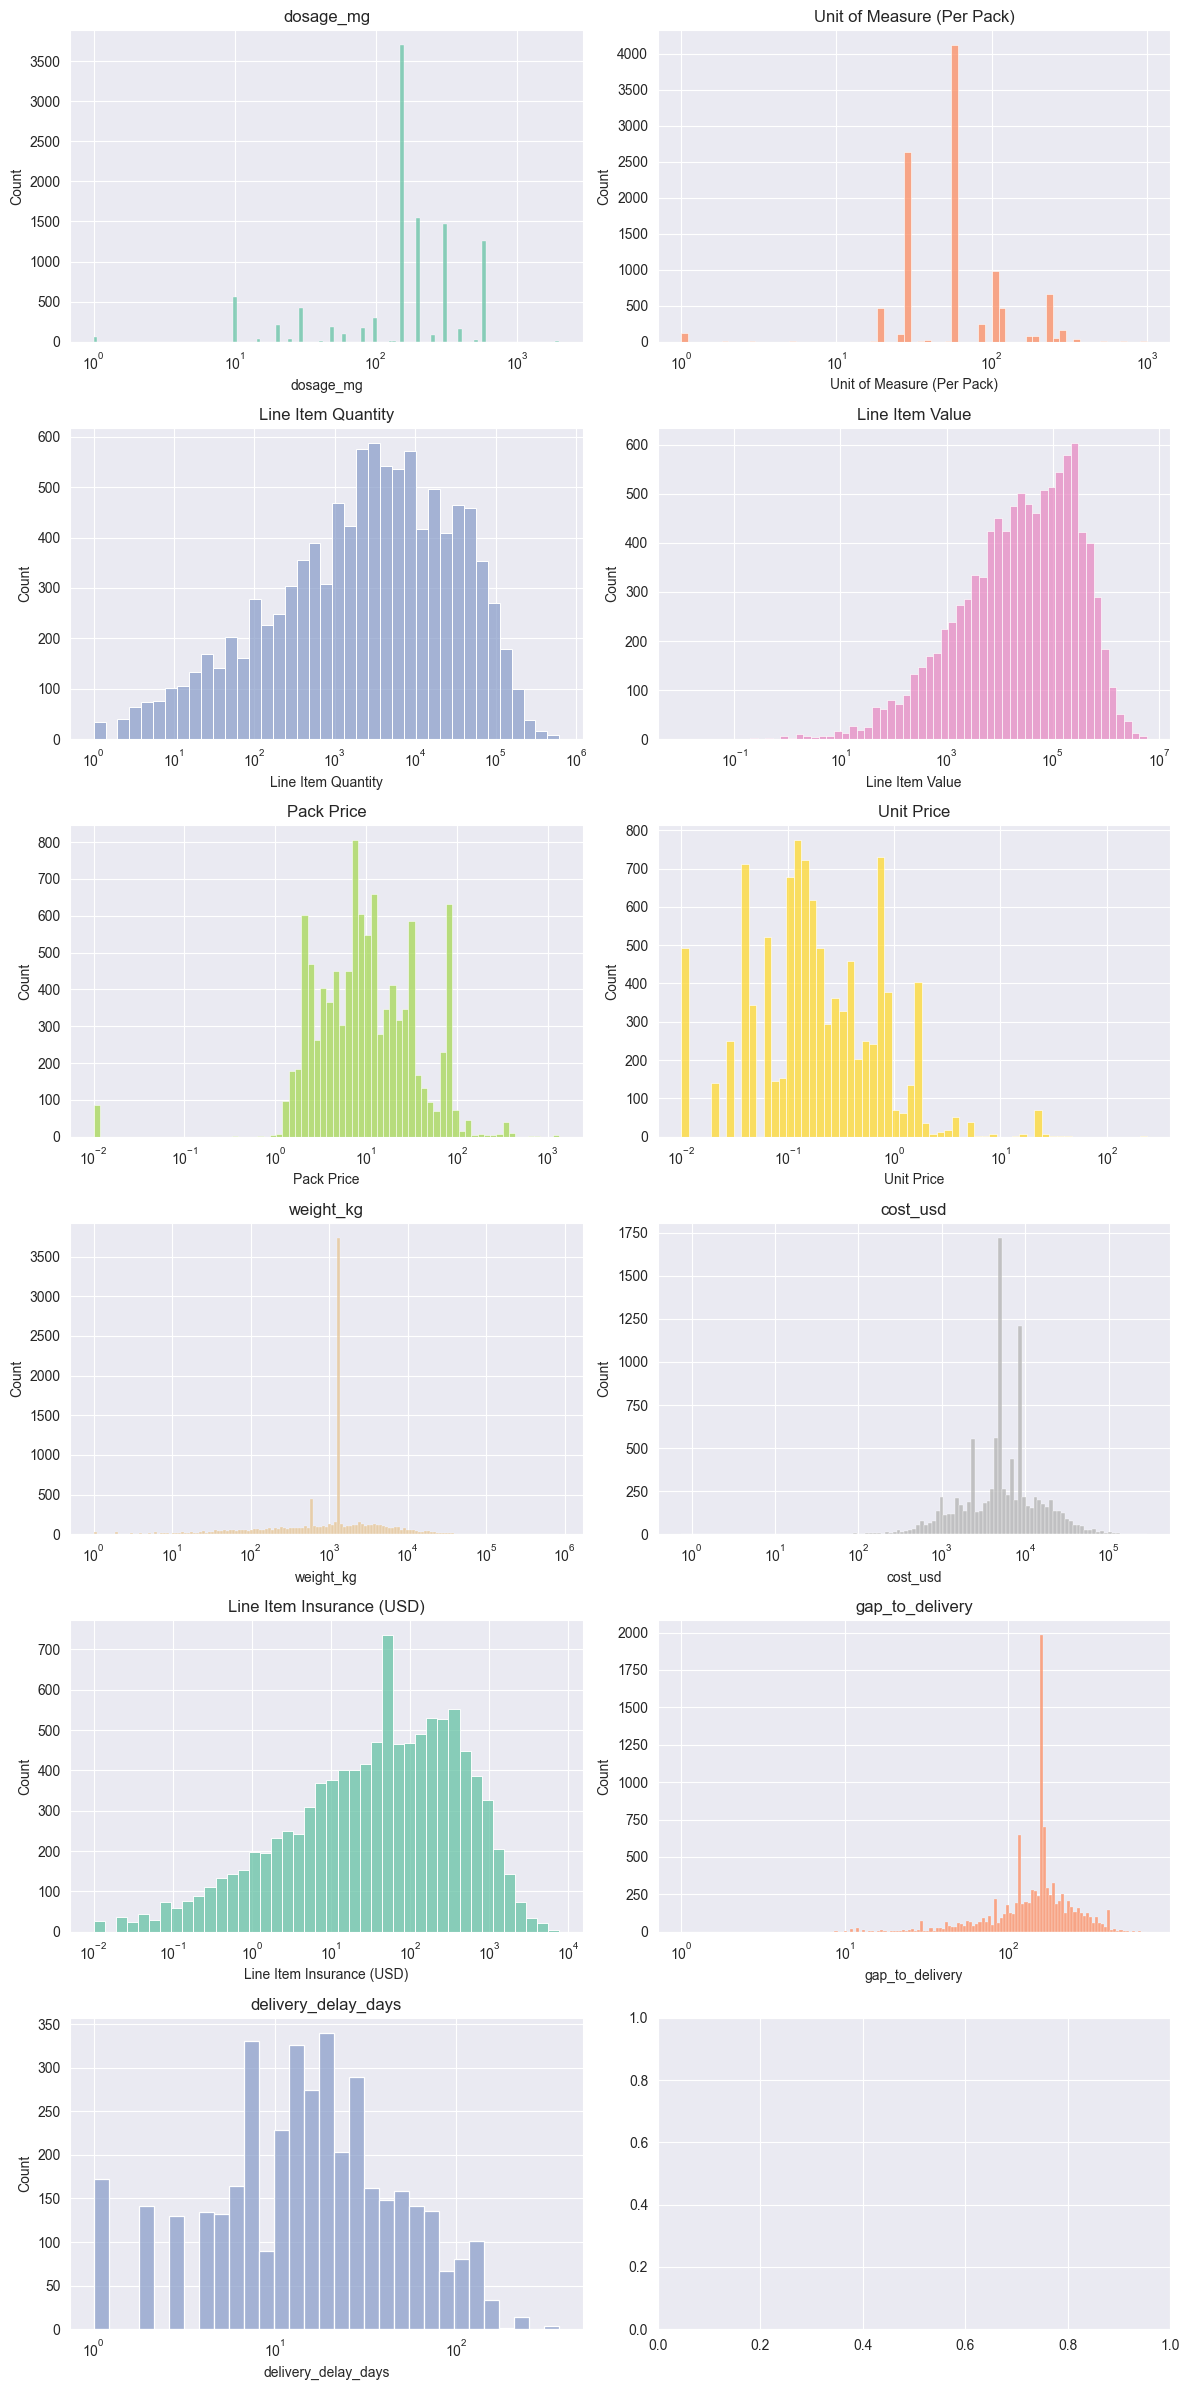

In [50]:
# plotting frequency distribution of all the numerical cols using logarithmic axes

fig, axes = plt.subplots(6, 2, figsize=(12, 24)) # this will form the same grid
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    sns.histplot(data=num_df, x=col, ax=axes[i], color=sns.color_palette("Set2", 11)[i], log_scale=(True, False)) # using a log  x axis
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

This tells us there are A LOT of outliers in our numerical columns  
Using box plots to visualise them

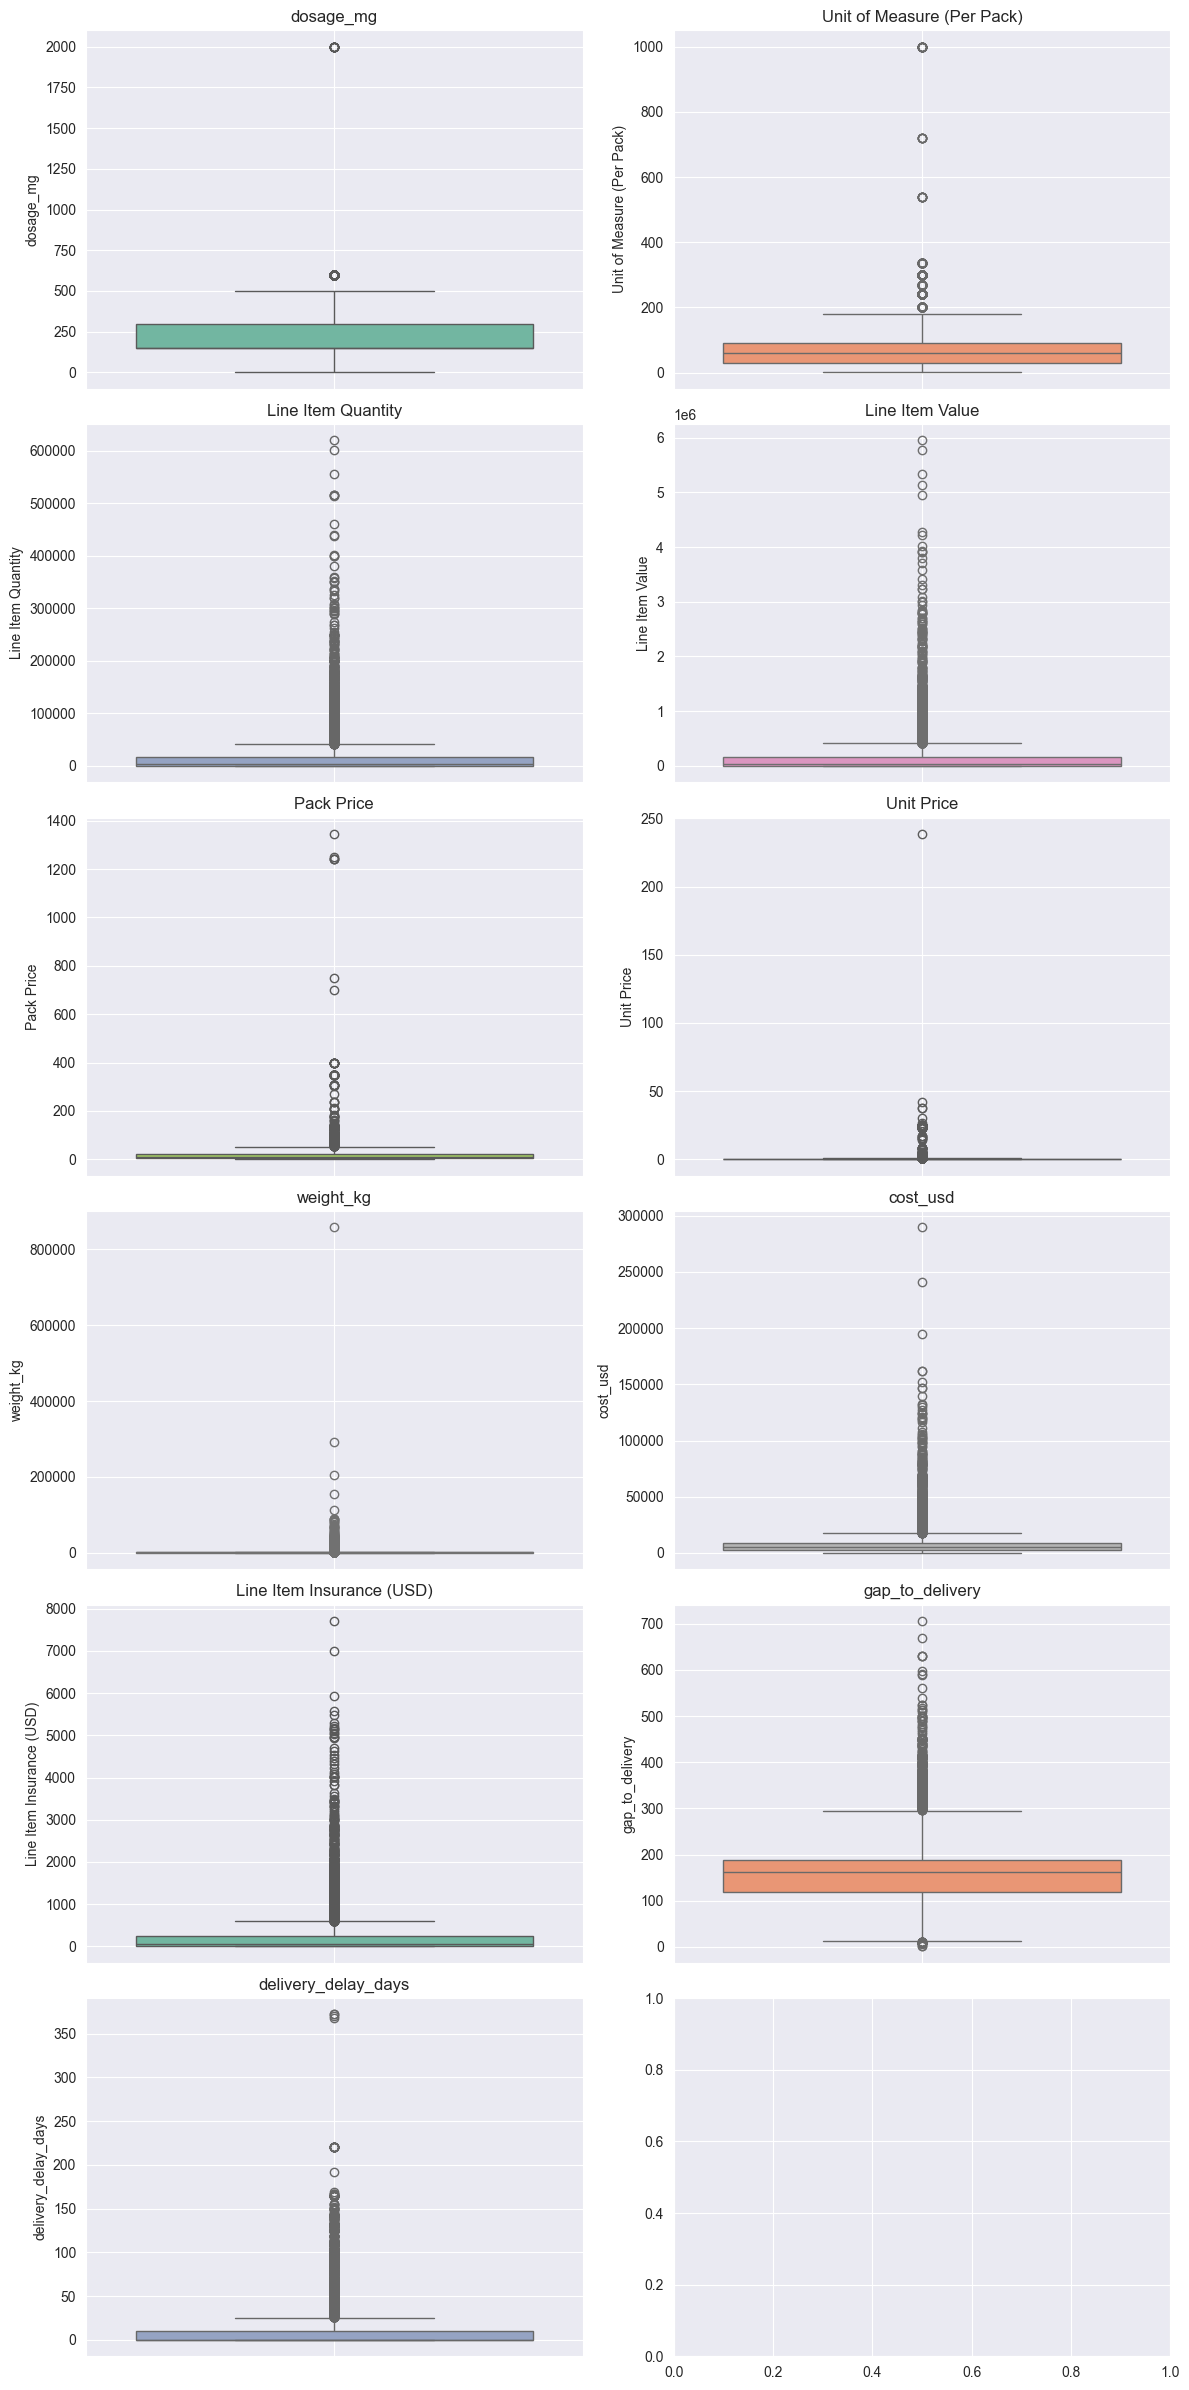

In [51]:
# box plots
fig, axes = plt.subplots(6, 2, figsize=(12, 24))
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    sns.boxplot(y=num_df[col], ax=axes[i], color=sns.color_palette("Set2", 11)[i])
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Given how many data points are outside the whiskers in this boxplot, standard practices suggest that all of them should be marked as outliers.  
With so many "outliers", however, I feel they aren't truly the outliers in this case.  
I'll plot another boxplot with a higher k value

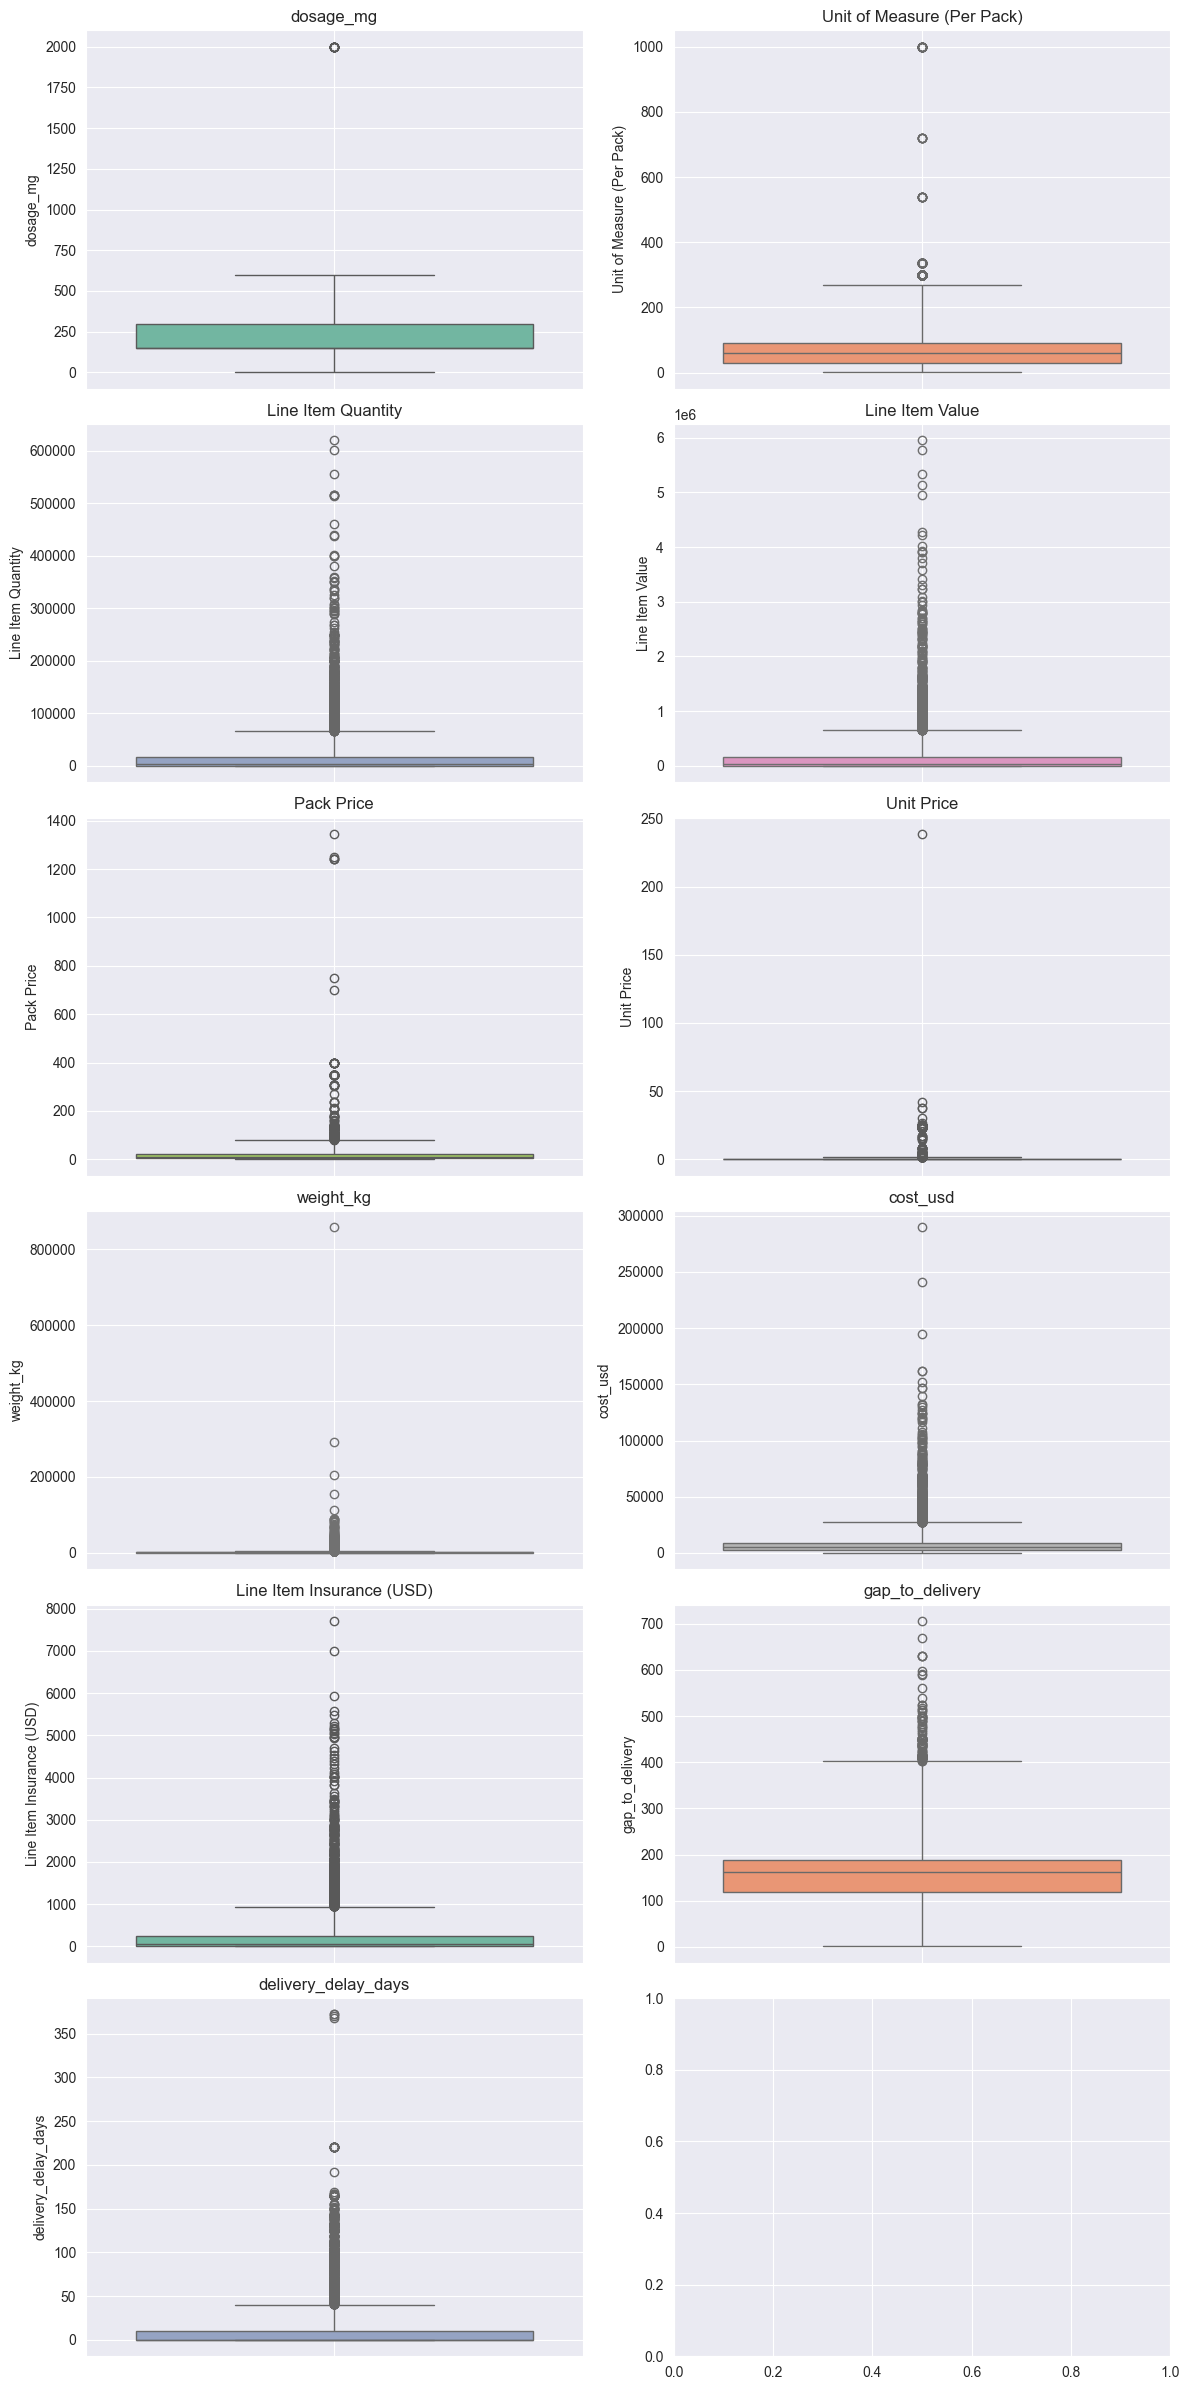

In [53]:
# box plots with a higher k value
fig, axes = plt.subplots(6, 2, figsize=(12, 24))
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    sns.boxplot(y=num_df[col], whis=3, ax=axes[i], color=sns.color_palette("Set2", 11)[i]) # whis = k
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

even with higher k values, most of the data points are outside the IQR  
the numerical columns in the dataset are ***HIGHLY*** skewed

this will impact how we interpret any further analysis that we do

I'll draw a violin plot for each column now.  
This will help us identify the relation between the IQRs & the distribution of the data

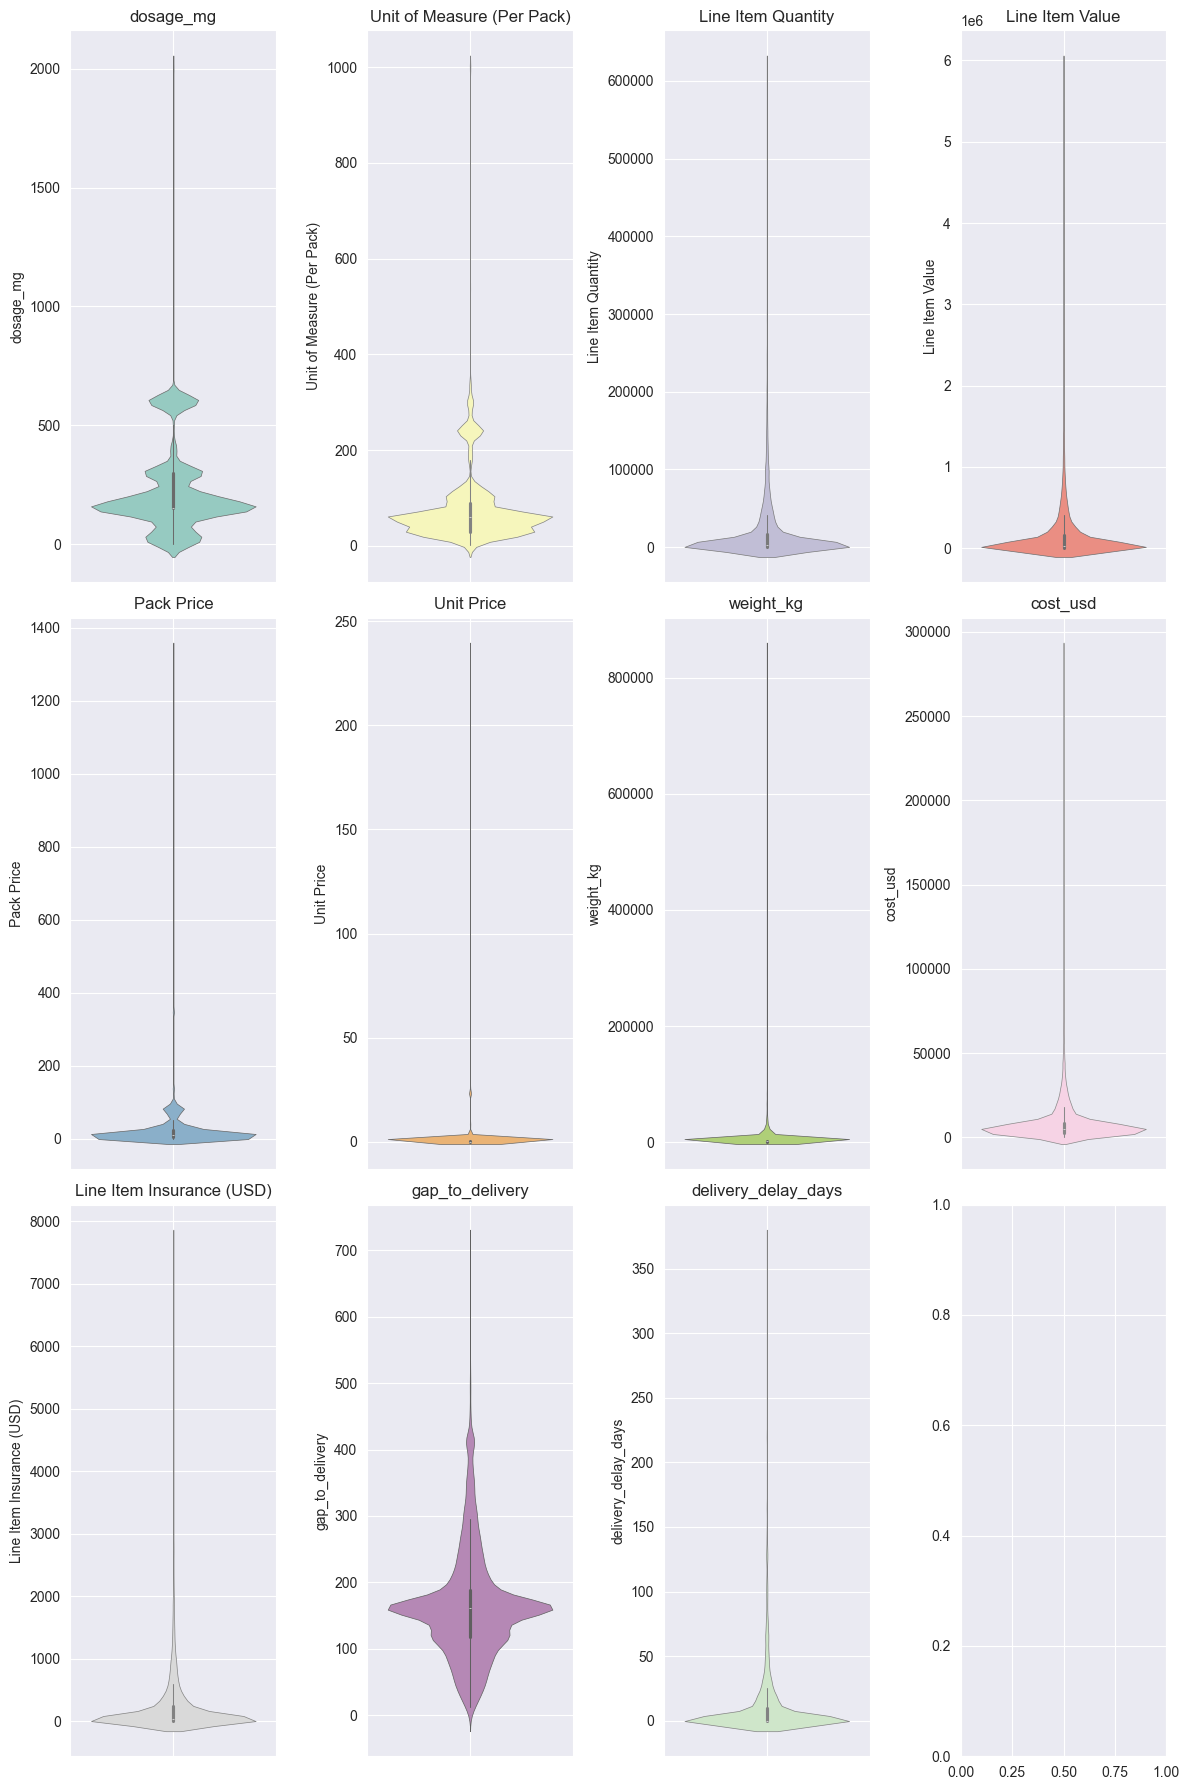

In [54]:
# violin plot
fig, axes = plt.subplots(3, 4, figsize=(12, 18)) 
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    sns.violinplot(data=num_df, y=col, ax=axes[i], color=sns.color_palette("Set3", 11)[i], linewidth=0.5)
    axes[i].set_title(col)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Violin plots further reinforce my hypothesis  
There are very few outliers, but there so far away from the bulk of the data that they're pulling the entire avarage with them.

Looking at the probability distribution we can tell majority of the data centered around the median & the IQR

### Categorical Column

All the categorical columns of the dataset are segregated in cat_df

Let's check & visualise the cardinality of these columns

In [55]:
# printing the total of unique columns
cat_df.nunique()

Country                    43
Managed By                  4
Fulfill Via                 2
Shipment Mode               4
Product Group               5
Sub Classification          6
Vendor                     73
Item Description          184
Molecule/Test Type         86
Brand                      48
Dosage Form                17
Manufacturing Site         88
First Line Designation      2
dtype: int64

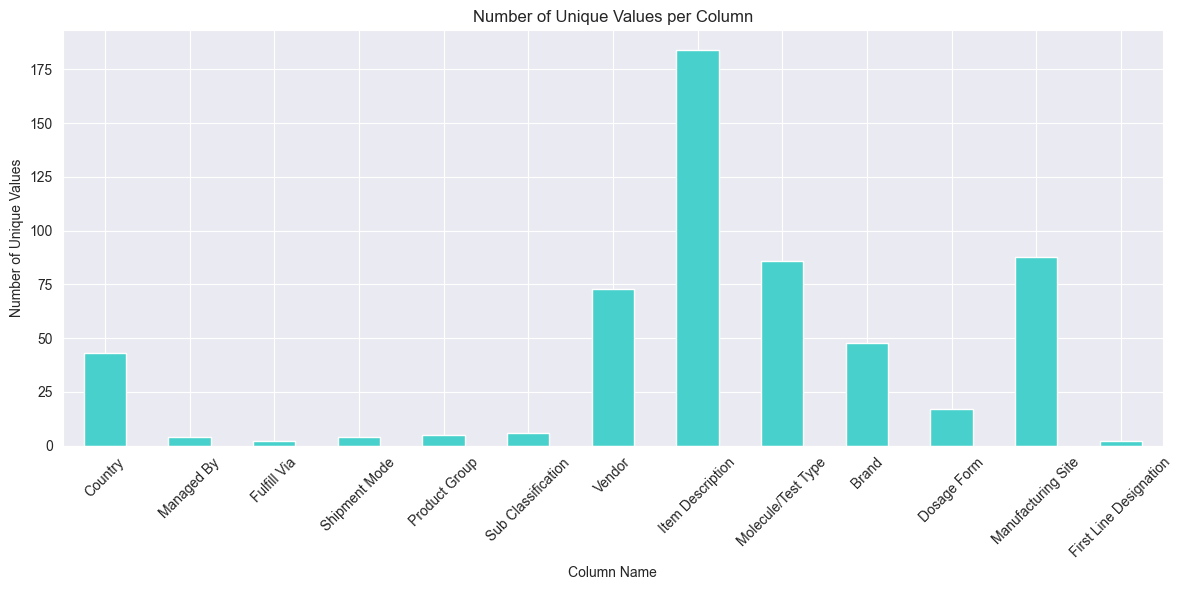

In [56]:
# visualisation via a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
cat_df.nunique().plot(kind='bar', ax=ax, color='mediumturquoise')

ax.set(title='Number of Unique Values per Column',
       xlabel='Column Name',
       ylabel='Number of Unique Values')

ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Columns that represent any sort of internal, company-specific categorisation of these shipments have very few unique values.  
This suggests that all these deliveries were carried out by a small number of teams & there's not a lot of variation  
(at leat on the level this oragnisation labels them)

The columns with the highest unique values is ```Item Description```

to check the frequency of unique values in each column, I can draw a bar graph for each column  
But doind that for 11 different columns isn't very efficient

So I'll squish all of that in one graph

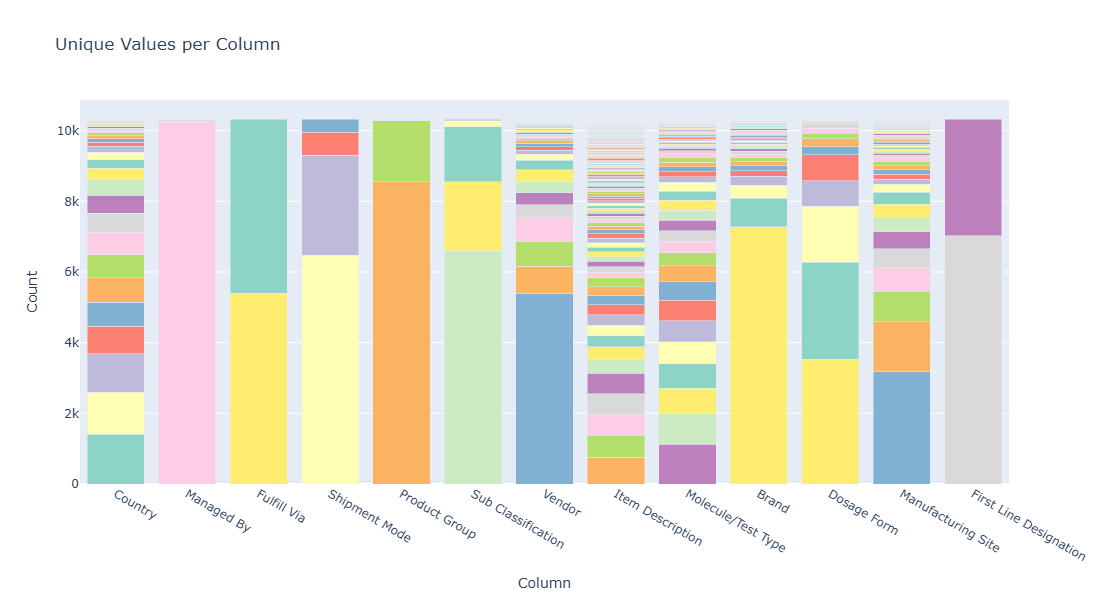

In [57]:
'''
a stacked bar graph
each bar is a column
each sub section is a unique value
it's height representing it's quqntity in that column
'''
columns = cat_df.columns
total_rows = len(cat_df)

fig = go.Figure()

color_cycle = cycle(px.colors.qualitative.Set3)

for col in columns:
    value_counts = cat_df[col].value_counts(dropna=False)
    for val, count in value_counts.items():
        percentage = round((count / total_rows) * 100, 2)
        color = next(color_cycle)
        fig.add_trace(go.Bar(
            x=[col],
            y=[count],
            name=str(val),
            marker=dict(color=color),
            hovertemplate=(
                f"<b>Column</b>: {col}<br>"
                f"<b>Value</b>: {val}<br>"
                f"<b>Count</b>: {count} / {total_rows}<br>"
                f"<b>Percentage</b>: {percentage}%<extra></extra>"
            ),
        ))

# stacking the bars
fig.update_layout(
    barmode='stack',
    title='Unique Values per Column',
    xaxis_title='Column',
    yaxis_title='Count',
    height=600,
    width=1100,
    showlegend=False,
)

fig.show()

This further reinforces the hypothesis that the logistic company worked on a set of deliveries it considers to be similiar  
Hence little variation in company level classifications

Maximum variation is in the columns whose values were under no influence from the shipment company

## Multivariate Analysis

we'll now find & plot the correlation of these columns with each other  
to see the trend of the data with respect to each point

<Axes: >

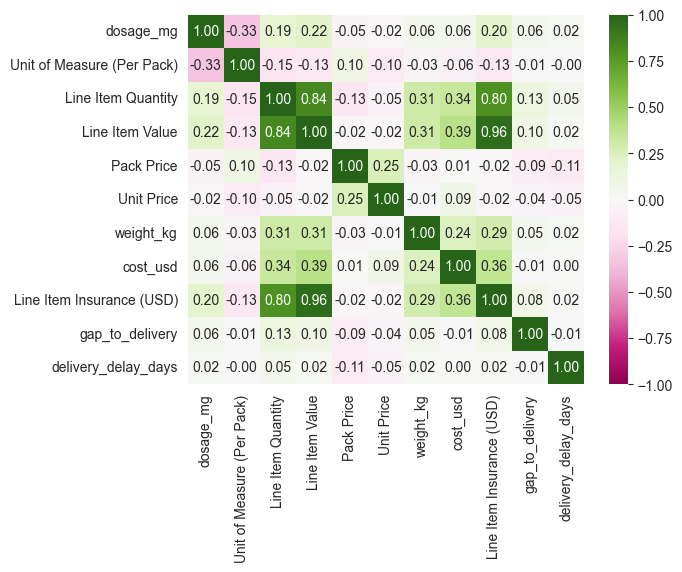

In [58]:
corr = num_df.corr() # finding the correlation 

sns.heatmap(corr, vmin=-1, vmax=1, cmap='PiYG', annot=True, fmt='.2f') # heatmap

There's *almost* no pink in the heatmap.  
Most columns are not correlated with each other.

Except for the line item columns, which makes sense

Let's see if country of origin has any effect on delivery performance

In [60]:
# creating a new column 'ontime_deliver'
df['delivery_delay_days'] = num_df['delivery_delay_days']
df['on_time_delivery'] = df['delivery_delay_days'] == 0

In [61]:
# grouping by country
country_grouped = df.groupby('Country')['on_time_delivery'].value_counts().unstack(fill_value=0)

# creating new columns for delayed and on time arrival
country_grouped.columns = ['Delayed', 'On Time']

# calculating global avarages
global_avg_on_time = df['on_time_delivery'].value_counts(normalize=False)[True] / df['Country'].nunique()
global_avg_delayed = df['on_time_delivery'].value_counts(normalize=False)[False] / df['Country'].nunique()

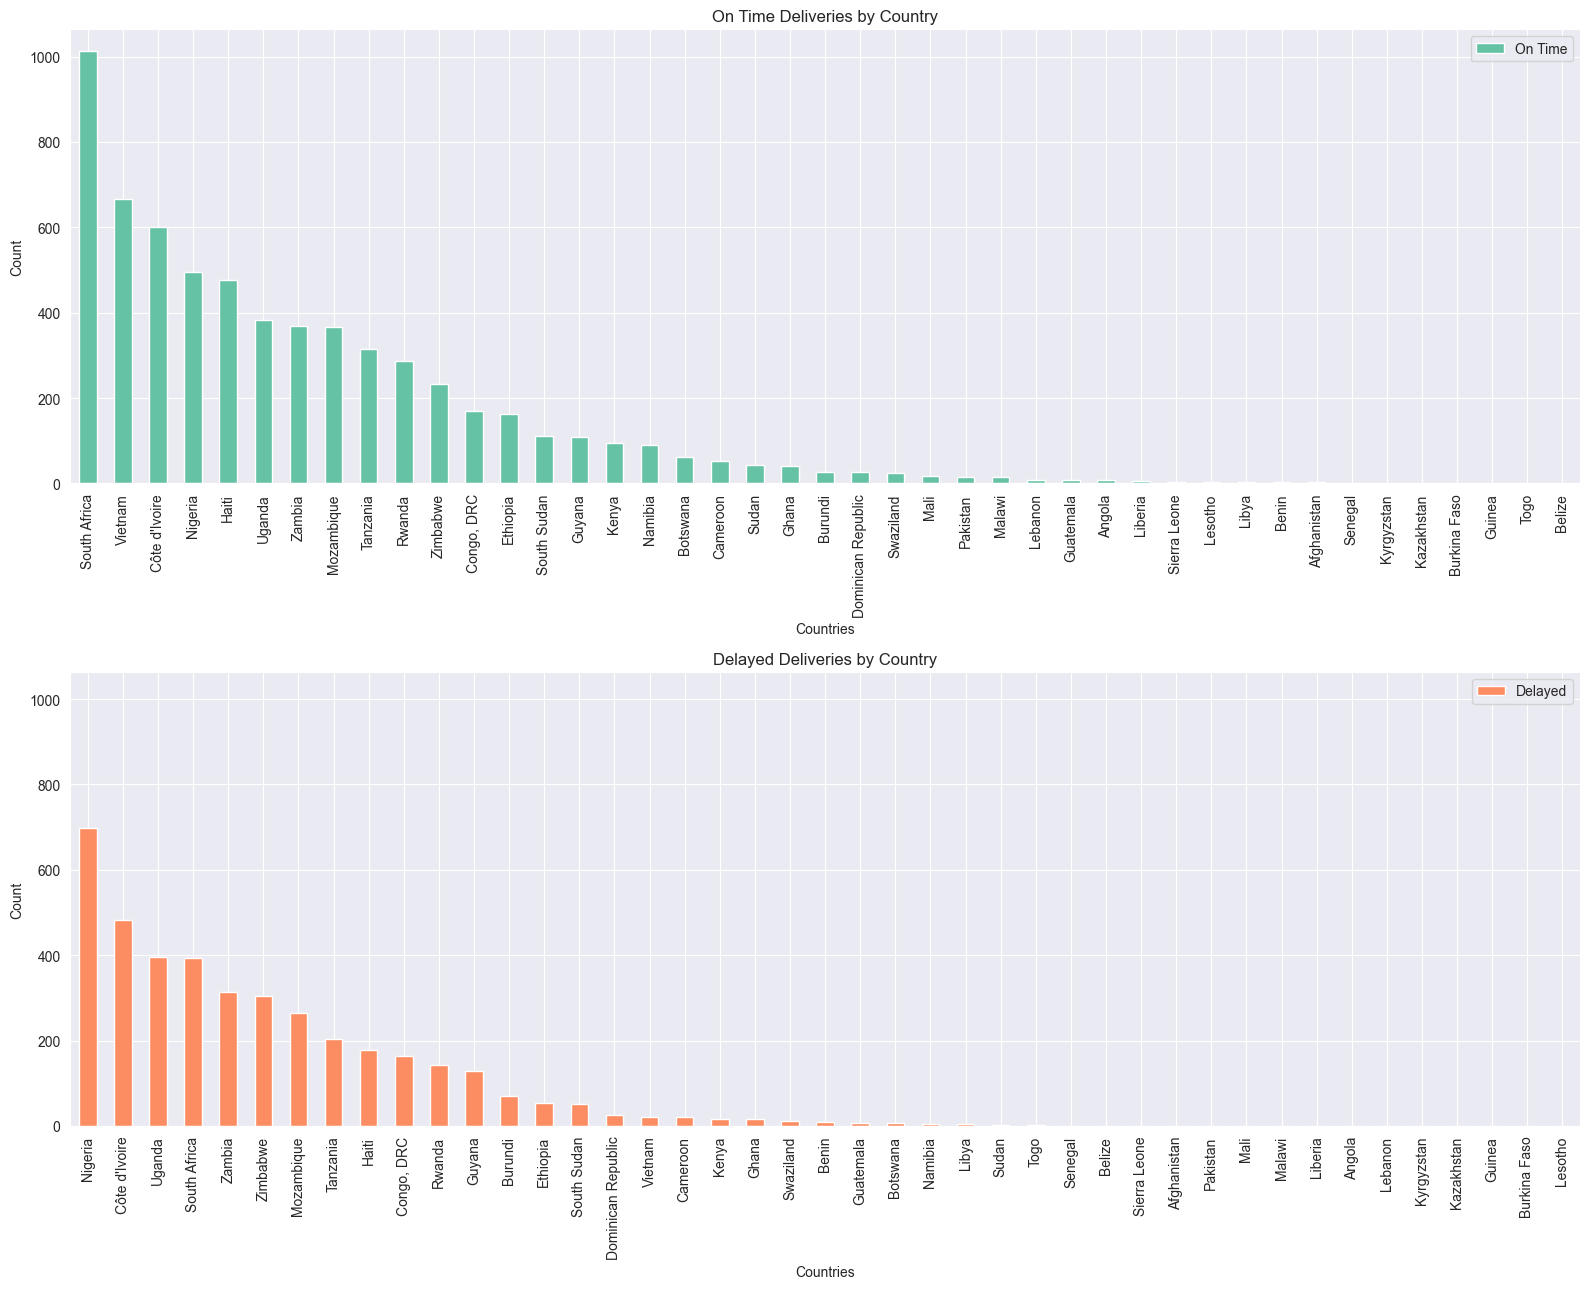

In [62]:
# sorting on time & delayed deliveries for better readability
on_time_sorted = country_grouped.sort_values(by='On Time', ascending=False)
delayed_sorted = country_grouped.sort_values(by='Delayed', ascending=False)

# two subplots for ontime & offtime deliveries
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 13), sharey=True)
colors = sns.color_palette('Set2')[:2]

country_grouped.plot(kind='bar', stacked=False, ax=ax, color=[colors[0], colors[1]])

# on time plot
on_time_sorted['On Time'].plot(kind='bar', color=colors[0], ax=ax1)
ax.axhline(global_avg_on_time, color=colors[0], linestyle='--', linewidth=1.5, label='Avg On Time')
ax.axhline(global_avg_delayed, color=colors[1], linestyle='--', linewidth=1.5, label='Avg Delayed')
ax1.set(
    title='On Time Deliveries by Country',
    xlabel='Countries',
    ylabel='Count'
)
ax1.tick_params(axis='x', rotation=90)
ax1.legend()

# off time plot
delayed_sorted['Delayed'].plot(kind='bar', color=colors[1], ax=ax2)
ax.axhline(global_avg_on_time, color=colors[0], linestyle='--', linewidth=1.5, label='Avg On Time')
ax.axhline(global_avg_delayed, color=colors[1], linestyle='--', linewidth=1.5, label='Avg Delayed')
ax2.set(
    title='Delayed Deliveries by Country',
    xlabel='Countries',
    ylabel='Count'
)
ax2.tick_params(axis='x', rotation=90)
ax2.legend()

plt.tight_layout()
plt.show()

Countries that have a higher chances of getting on time deliveries are  
- South Africa
- Vietnam
- Haiti

Countires with a higher chances of getting delayed deliveries are  
- Nigeria
- Uganda
- Tanzania

Countries with somewhat of an equal chance of getting delayed or on time deliveries  
- Côte d'Ivoire
- Zimba
- Dominican Republic of Congo

Let's the ditribution of on time & delayed deliveries based on shipment mode

In [63]:
# grouping by shipment mode
shipment_grouped = df.groupby('Shipment Mode')['on_time_delivery'].value_counts().unstack(fill_value=0)

# creating new columns for delayed and on time arrival
shipment_grouped.columns = ['Delayed', 'On Time']

# calculating global avarages
global_avg_on_time = df['on_time_delivery'].value_counts(normalize=False)[True] / df['Shipment Mode'].nunique()
global_avg_delayed = df['on_time_delivery'].value_counts(normalize=False)[False] / df['Shipment Mode'].nunique()

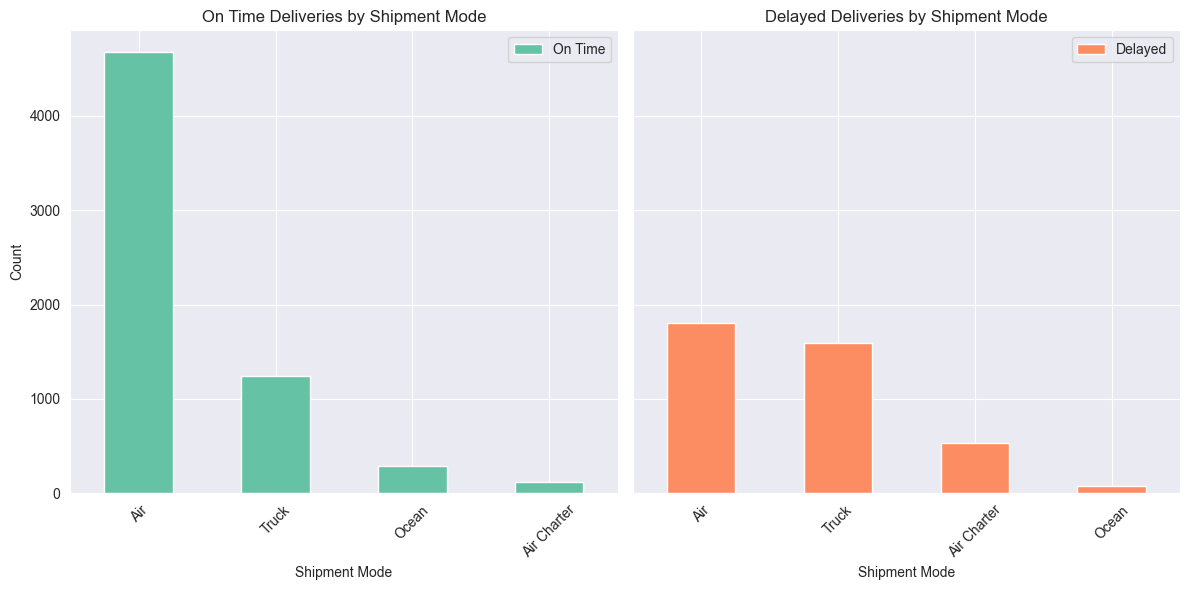

In [64]:
# sorting on time & delayed deliveries for better readability
on_time_sorted = shipment_grouped.sort_values(by='On Time', ascending=False)
delayed_sorted = shipment_grouped.sort_values(by='Delayed', ascending=False)

# two subplots for ontime & offtime deliveries
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
colors = sns.color_palette('Set2')[:2]

shipment_grouped.plot(kind='bar', stacked=False, ax=ax, color=[colors[0], colors[1]])

# on time plot
on_time_sorted['On Time'].plot(kind='bar', color=colors[0], ax=ax1)
ax.axhline(global_avg_on_time, color=colors[0], linestyle='--', linewidth=1.5, label='Avg On Time')
ax.axhline(global_avg_delayed, color=colors[1], linestyle='--', linewidth=1.5, label='Avg Delayed')
ax1.set(
    title='On Time Deliveries by Shipment Mode',
    xlabel='Shipment Mode',
    ylabel='Count'
)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# off time plot
delayed_sorted['Delayed'].plot(kind='bar', color=colors[1], ax=ax2)
ax.axhline(global_avg_on_time, color=colors[0], linestyle='--', linewidth=1.5, label='Avg On Time')
ax.axhline(global_avg_delayed, color=colors[1], linestyle='--', linewidth=1.5, label='Avg Delayed')
ax2.set(
    title='Delayed Deliveries by Shipment Mode',
    xlabel='Shipment Mode',
    ylabel='Count'
)
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

The shipment modes highest delyaes & on time count is ```Air```  
Which makes sense, as it the most common mode of shipment, it is more likey to have a higher value in both the cases

Shipments from ```truck```, howver, tends to get delayed more  
This could be because trucks are more likey to lose time in places like traffic jams

Same with ```Air Charter```, which seems counter intuitive  
As shipment companies usually have the full control of the air craft in case of air charter flights  
Maybe this control results in more bureaucracy on the ground level, causing a delay

Shipments going through the ```Ocean``` are less delayed  
However, boats can't deliver goods to land locked countries, so it's not a clear cut solution

Let's see the relation between ```cost_usd``` & ```Line Item Insurance (USD)```

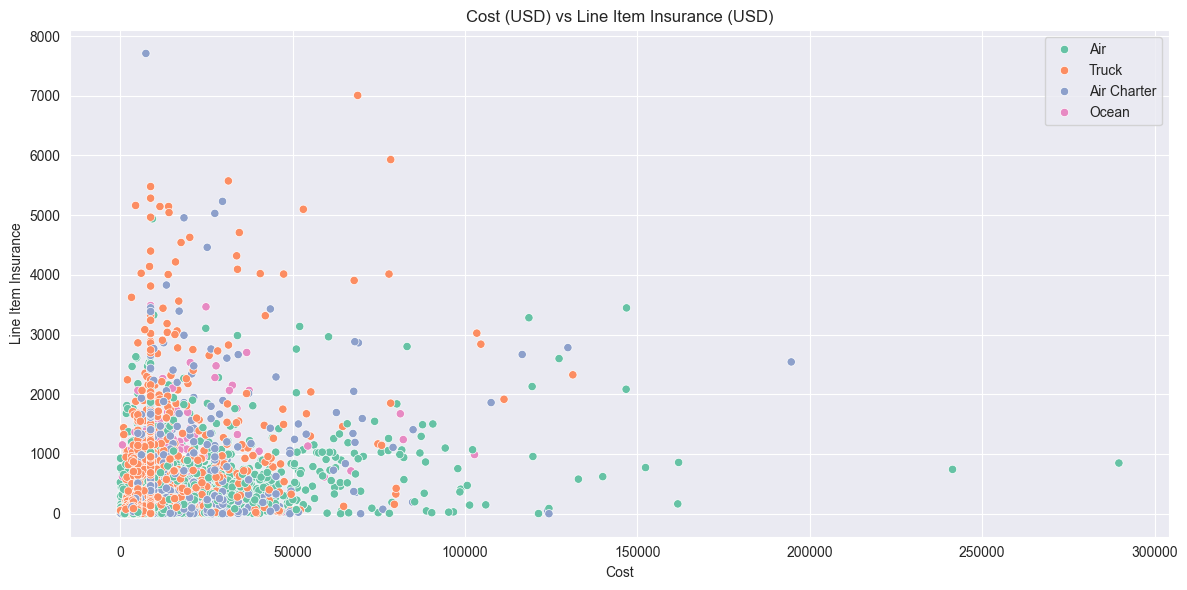

In [65]:
# plotting a scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=df, x='cost_usd', y='Line Item Insurance (USD)', hue='Shipment Mode', ax=ax) # colour coded acc to shipment mode

ax.set(
    title='Cost (USD) vs Line Item Insurance (USD)',
    xlabel='Cost',
    ylabel='Line Item Insurance'
)
ax.legend()
plt.tight_layout()
plt.show()

There's a lot of variation in this plot

Shipment Mode doesn't effect the cost or insurance in any discernable way  
Insurance cost & overall cost are also inconsistent

Some low cost shipment have a very high insurance value  
And almost no high cost shipment have a high insurance value

This tells us that insurance cost isn't a clear cut percentage of the total cost  
Not even in the slightest

It could depend on the amount being tranffered, risk involved, etc

Let's see the relationn between ```Line Item Value``` and ```Line Item Insurance```

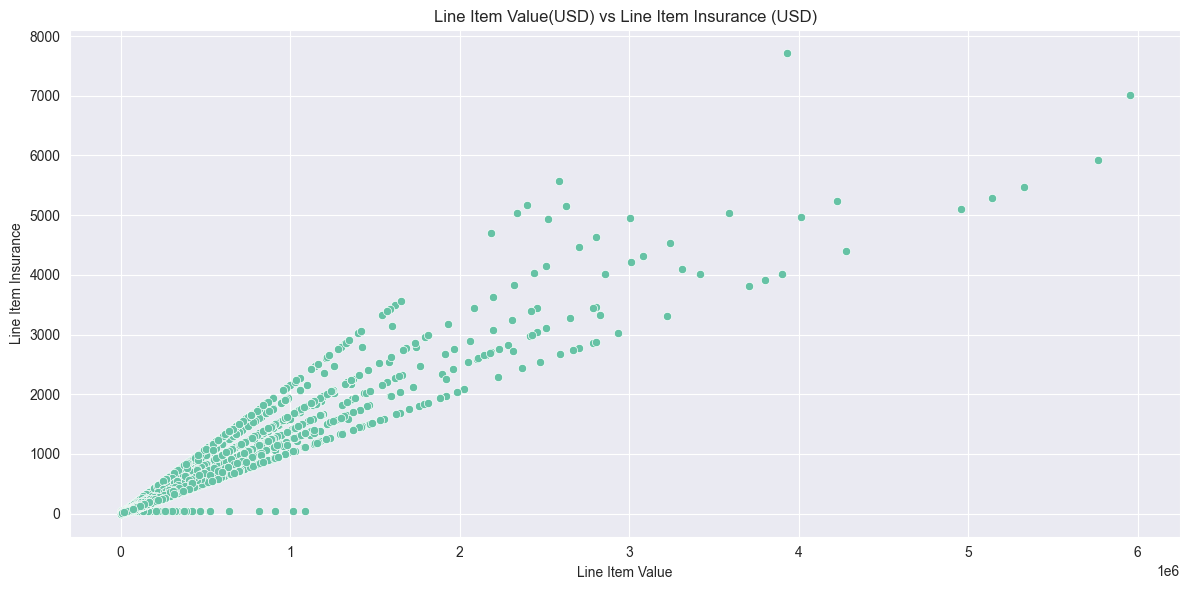

In [66]:
# plotting a scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(data=df, x='Line Item Value', y='Line Item Insurance (USD)', ax=ax) # colour coded acc to shipment mode

ax.set(
    title='Line Item Value(USD) vs Line Item Insurance (USD)',
    xlabel='Line Item Value',
    ylabel='Line Item Insurance'
)
# ax.legend()
plt.tight_layout()
plt.show()

That's a very informative graph

Straight lines at different slopes  
It tells us that insurance is a function of line item value

Different groups have different rates (hence the different slopes)  
These groups can be defined based on different factors such as vendors, shipment modes, classification, etc

# Insights & Findings

In [67]:
"""
'NaN' values aren't many but the data has a lot of hidden missing values, some columns had as much as 55%-56% missing values.
Decided to drop INCO Terms & PO Date columns, as they were basically hollow

---NUMERICAL COLUMNS---

Numerical columns are HIGHLY skewed, having unsually high values, pulling the avg towards them & distorting the boxplots.
This was later proved by boxplots & violin plots, even with a higher k value.
Violin plots showed that there are VERY few outliers, they have a very low probability distribution

---CATEGORICAL COLUMNS---

Most of the columns used for company level categorisation of these deliveries had a very low cardinality
(ex: sub classification, shipment mode, managed by)
This suggests that these shipments weren't very varied or different, at least on a company level
They were managed by a small number of teams & had very small sub classifications etc
Especially compared to the no of total rows in the data set

---MULTIVARIATE ANALYSIS---

Almost all of the deliveries by a single team 'PMO-US'
So it was difficult to determine if they had any contirbution to deliveries reaching on time compared to other teams
As other teams only handled 0.57% of the total deliveries, there was nothing to compare "PMO-US's" performance with

Shipments by air have a higher chance of arriving on time
But air shipments also had the highest delayed arrival overall

Shipments arriving via trucks have a higher chance of getting delayed than arriving on time
Which makes sense as trucks can lose time in places like traffic jams
The count of, however, on time & delayed arrivals via truck isn't that far off

Shipments via ocean were on time rather than being delayed
But they have a disadvantage as ships cant deliver to land locked countries

Air Charter shipments are supposed to be faster, but they were rather more delayed than on time
Could be because full control of an aircraft results in more bureaucracy on the airports

Countries that have a higher chances of getting on time deliveries are-
-South Africa
-Vietnam
-Haiti

Countires with a higher chances of getting delayed deliveries are-
-Nigeria
-Uganda
-Tanzania

Countries with somewhat of an equal chance of getting delayed or on time deliveries-
-Côte d'Ivoire
-Zimba
-Dominican Republic of Congo

There is no dissernable pattern between the cost of a weight of a shipment & it's insurance value
There is, however, a very strong relation between it's value & the insurance amount
A scatter plot showed multiple diagonal lines with different slopes
This suggests that insurance amount is a func of the value of a product, just at different rates
(hence multiple lines at diff slopes)
these rates can depend on many different things
They, however, don't follow any pattern based on any other categorical column in this data set
"""
print()

# Advice for the Shareholders

1) More shipments should be handed out to other teams.<br>
   Currently >99% of the shipments were managed by a single team.<br>
   This can induce more errors due to fatigue
   
2) Try to stay ahead of the reasons which are causing trucks to lose time.<br>
   If it's traffic, try to estimate the crowd before hand & send out the trucks accordingly.
   
3) Air shipment is usually considered faster than other modes of transport.<br>
   Still charter air shipments arrive later than usual.<br>
   Try to find & fix the reasons behind that.
   
4) Try to find what's causing delays in countries like Nigeria, Côte d'Ivoire, etc<br>
   See what's working for countries like South Africa & apply inspired solutions.

This concludes our exploratory data analysis.